In [3]:
from HeaderP import *

In [449]:
"""ztfstars = pd.read_csv('../NewGyroKineage/allGyroAge_GP_kinematic.csv')
ztffeh = pd.read_csv('../StarAgeComp/table-1.csv')
len(ztfstars), len(ztffeh)"""

(31522, 124060658)

In [450]:
"""ztfstars = pd.merge(ztfstars, ztffeh, left_on='source_id', 
                   right_on='source_id',how='inner')
len(ztfstars)"""

27358

In [451]:
#ztfstars.to_pickle('kingmatic_age_mh.pkl')

In [19]:
ztfstars = pd.read_pickle('kingmatic_age_mh.pkl')
ztfstars['vr'] = -(ztfstars['x'] * ztfstars['vx'] + ztfstars['y'] * ztfstars['vy'])/ztfstars['R']
ztfstars['vphi'] = -(ztfstars['x'] * ztfstars['vy'] - ztfstars['y'] * ztfstars['vx'])/ztfstars['R']
ztfstars['Rg'] = -ztfstars['Lz']/240

In [20]:
ztfstars['Rb'] = getRb(ztfstars['gyroAge'], ztfstars['mh_xgboost'])


100%|████████████████████████████████████████████████████████████████████████████████████| 27358/27358 [00:00<00:00, 47116.31it/s]


<AxesSubplot:>

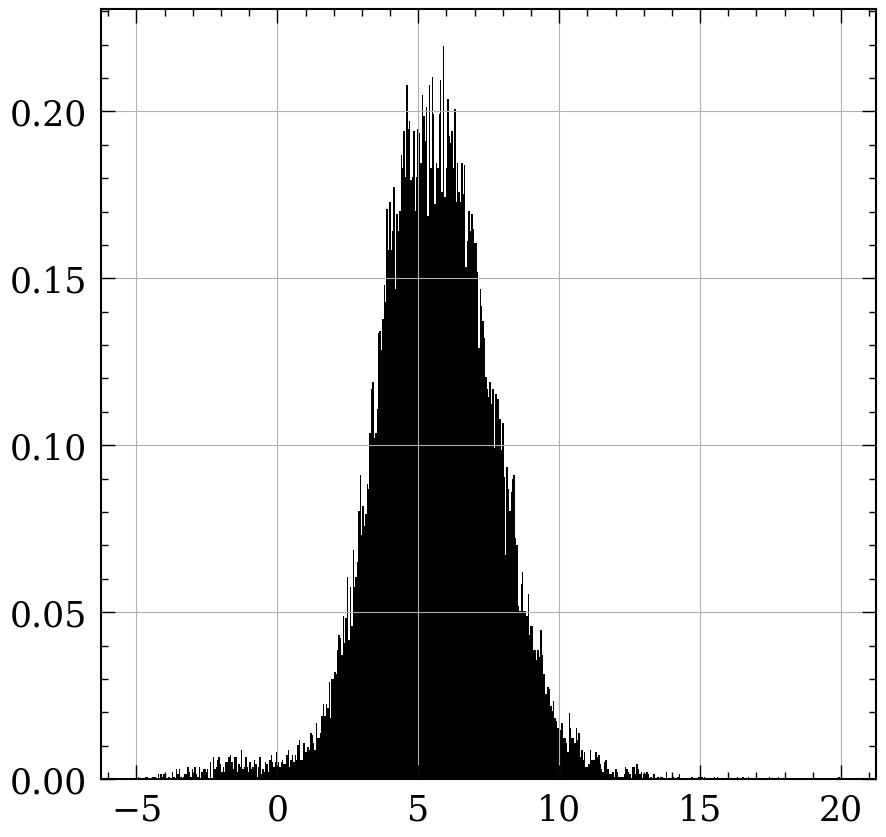

In [21]:
ztfstars['Rb'].hist(bins=np.linspace(-5,20,500), color='k', density=True)
#ztfstars['R'].hist(bins=np.linspace(-5,20,500), color='r', density=True)

(-100.0, 100.0)

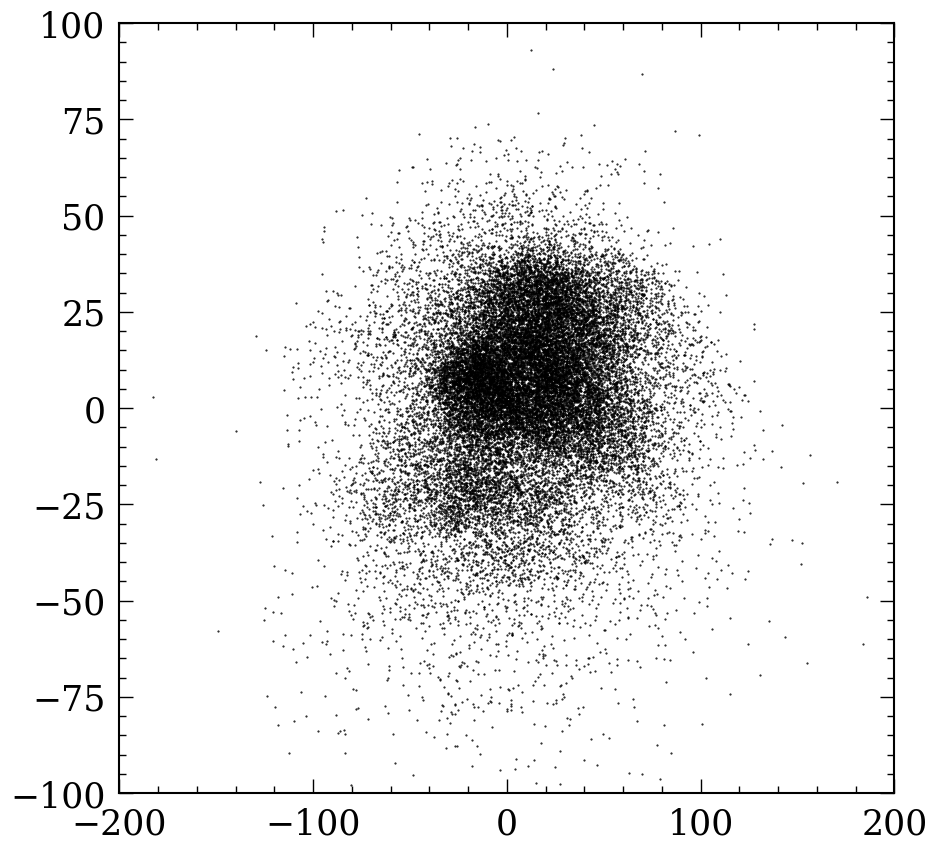

In [22]:
plt.plot(ztfstars['vx'], ztfstars['vy']-220, 'k.', markersize=1)
plt.xlim([-200,200])
plt.ylim([-100,100])

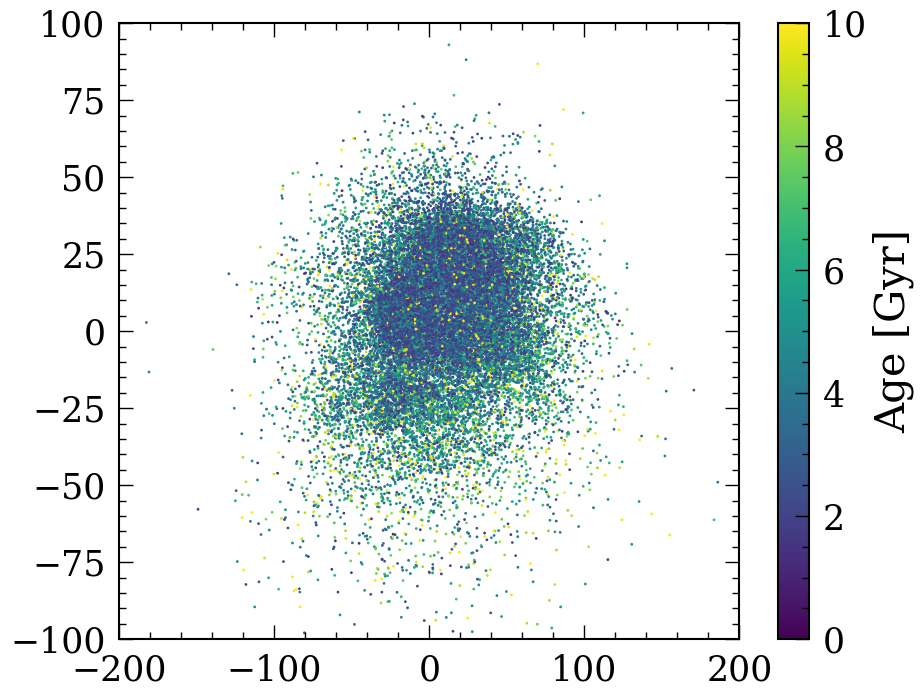

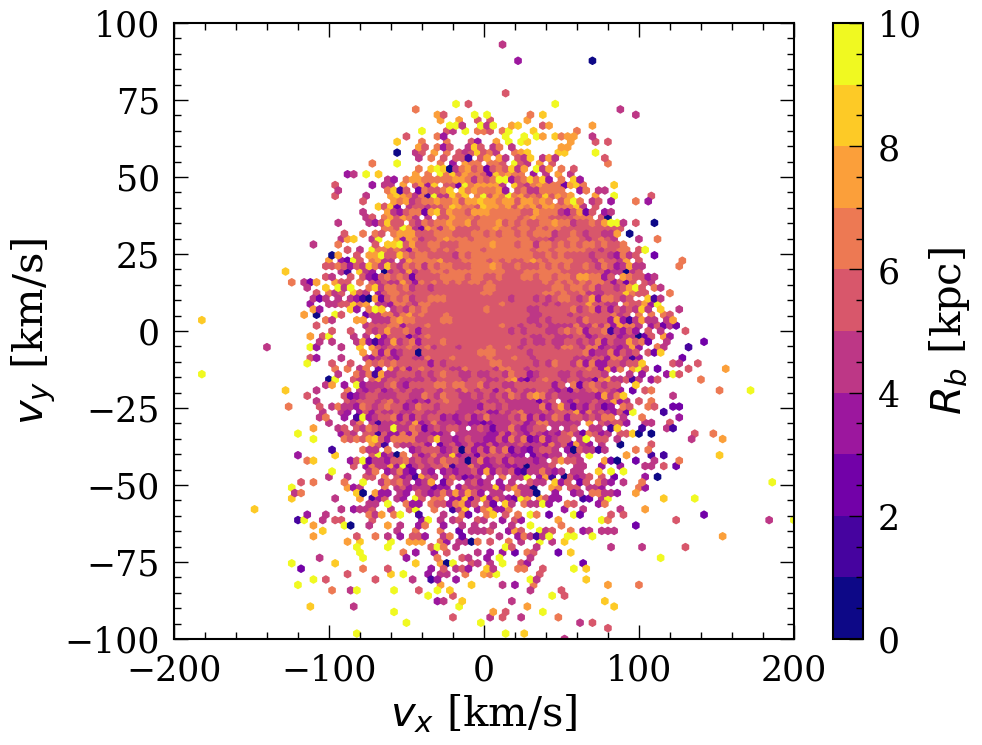

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(ztfstars['vx'], ztfstars['vy']-220, c=ztfstars['gyroAge'], s=1,
           vmin=0, vmax=10)
plt.xlim([-200,200])
plt.ylim([-100,100])
plt.colorbar(label='Age [Gyr]')

plt.figure(figsize=(10,8))
plt.hexbin(ztfstars['vx'], ztfstars['vy']-220, C=ztfstars['Rb'], 
           vmin=0, vmax=10, extent=(-200,200,-100,100),
          cmap=plt.get_cmap('plasma',10))
plt.xlim([-200,200])
plt.ylim([-100,100])
plt.xlabel('$v_x$ [km/s]')
plt.ylabel('$v_y$ [km/s]')
plt.colorbar(label='$R_b$ [kpc]')

22025


Text(0, 0.5, '$z$/$σ_{z}$')

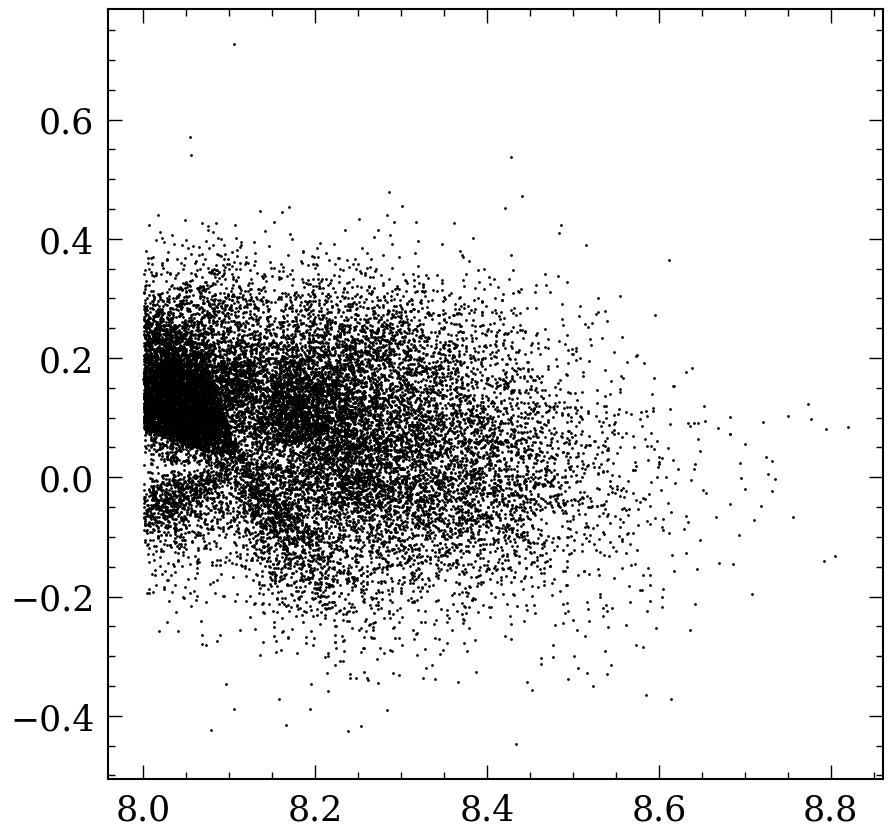

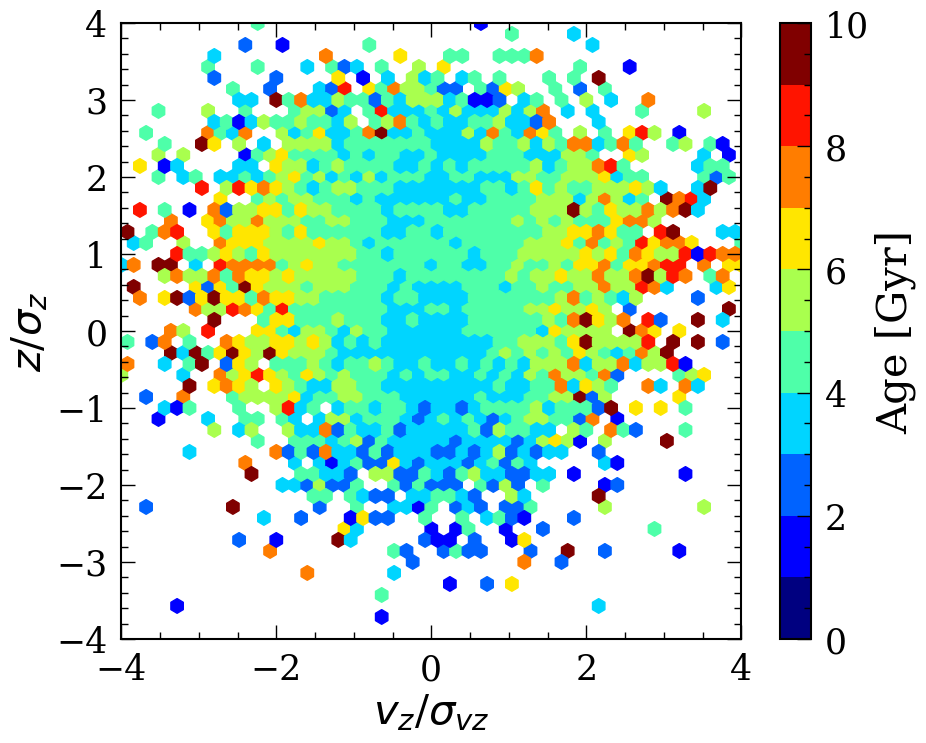

In [9]:
msel = (ztfstars['R']>8)
print(sum(msel))

plt.figure()
plt.scatter(ztfstars[msel]['R'], ztfstars[msel]['z'], 
            c='k', s=1)

plt.figure(figsize=(10,8))
plt.hexbin((ztfstars[msel]['vz'])/np.std(ztfstars[msel]['vz']), 
           ztfstars[msel]['z']/np.std(ztfstars[msel]['z']), 
           C=ztfstars[msel]['gyroAge'],
           vmin=0,vmax=10, extent=(-4,4,-4,4), cmap=plt.get_cmap('jet',10),
          gridsize=50)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.colorbar(label='Age [Gyr]')
plt.xlabel('$v_z$/$σ_{vz}$')
plt.ylabel('$z$/$σ_{z}$')

  0%|                                                                                                      | 0/49 [00:00<?, ?it/s]/var/folders/w0/h14c78gj4rs91wsbcjh87y2m0000gn/T/ipykernel_3842/4005734797.py:9: RuntimeWarning: invalid value encountered in true_divide
  H[i,:] = H[i,:]/sum(m)
100%|████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 707.25it/s]


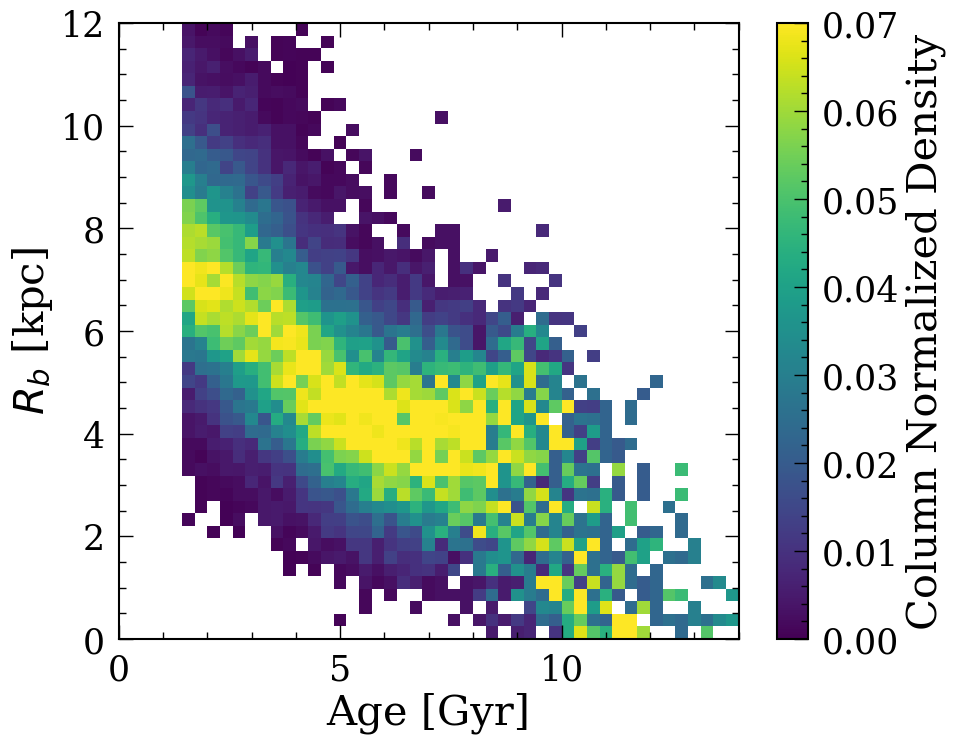

In [12]:
def coldensity(x,y,binsize=50,extend=[]):
    if len(extend)==0:
        extend=(min(x),max(x),min(y),max(y))
    H, yedges, xedges = np.histogram2d(x, y, 
                                bins=(np.linspace(extend[0],extend[1],binsize),
                                        np.linspace(extend[2],extend[3],binsize)))
    for i in trange(len(yedges)-1):
        m = (x>yedges[i])&(x<yedges[i+1])
        H[i,:] = H[i,:]/sum(m)

    for i in range(len(H[0,:])):
        for j in range(len(H[:,0])):
            if H[j,i] == 0:
                H[j,i] = np.nan

    return yedges, xedges, H.T



plt.figure(figsize=(10,8))
"""plt.hexbin(ztfstars['gyroAge'], ztfstars['Rb'], cmap='binary',
          extent=(0,14,0,12), mincnt=2, gridsize=50, bins='log')"""

yedges, xedges, H = coldensity(ztfstars['gyroAge'], ztfstars['Rb'],binsize=50,
          extend=(0,14,0,12))

plt.pcolormesh(yedges, xedges, H, vmin=0, vmax=0.07)


plt.colorbar(label='Column Normalized Density')
plt.xlabel('Age [Gyr]')
plt.ylabel('$R_b$ [kpc]')
plt.savefig('Rb_hist.png')

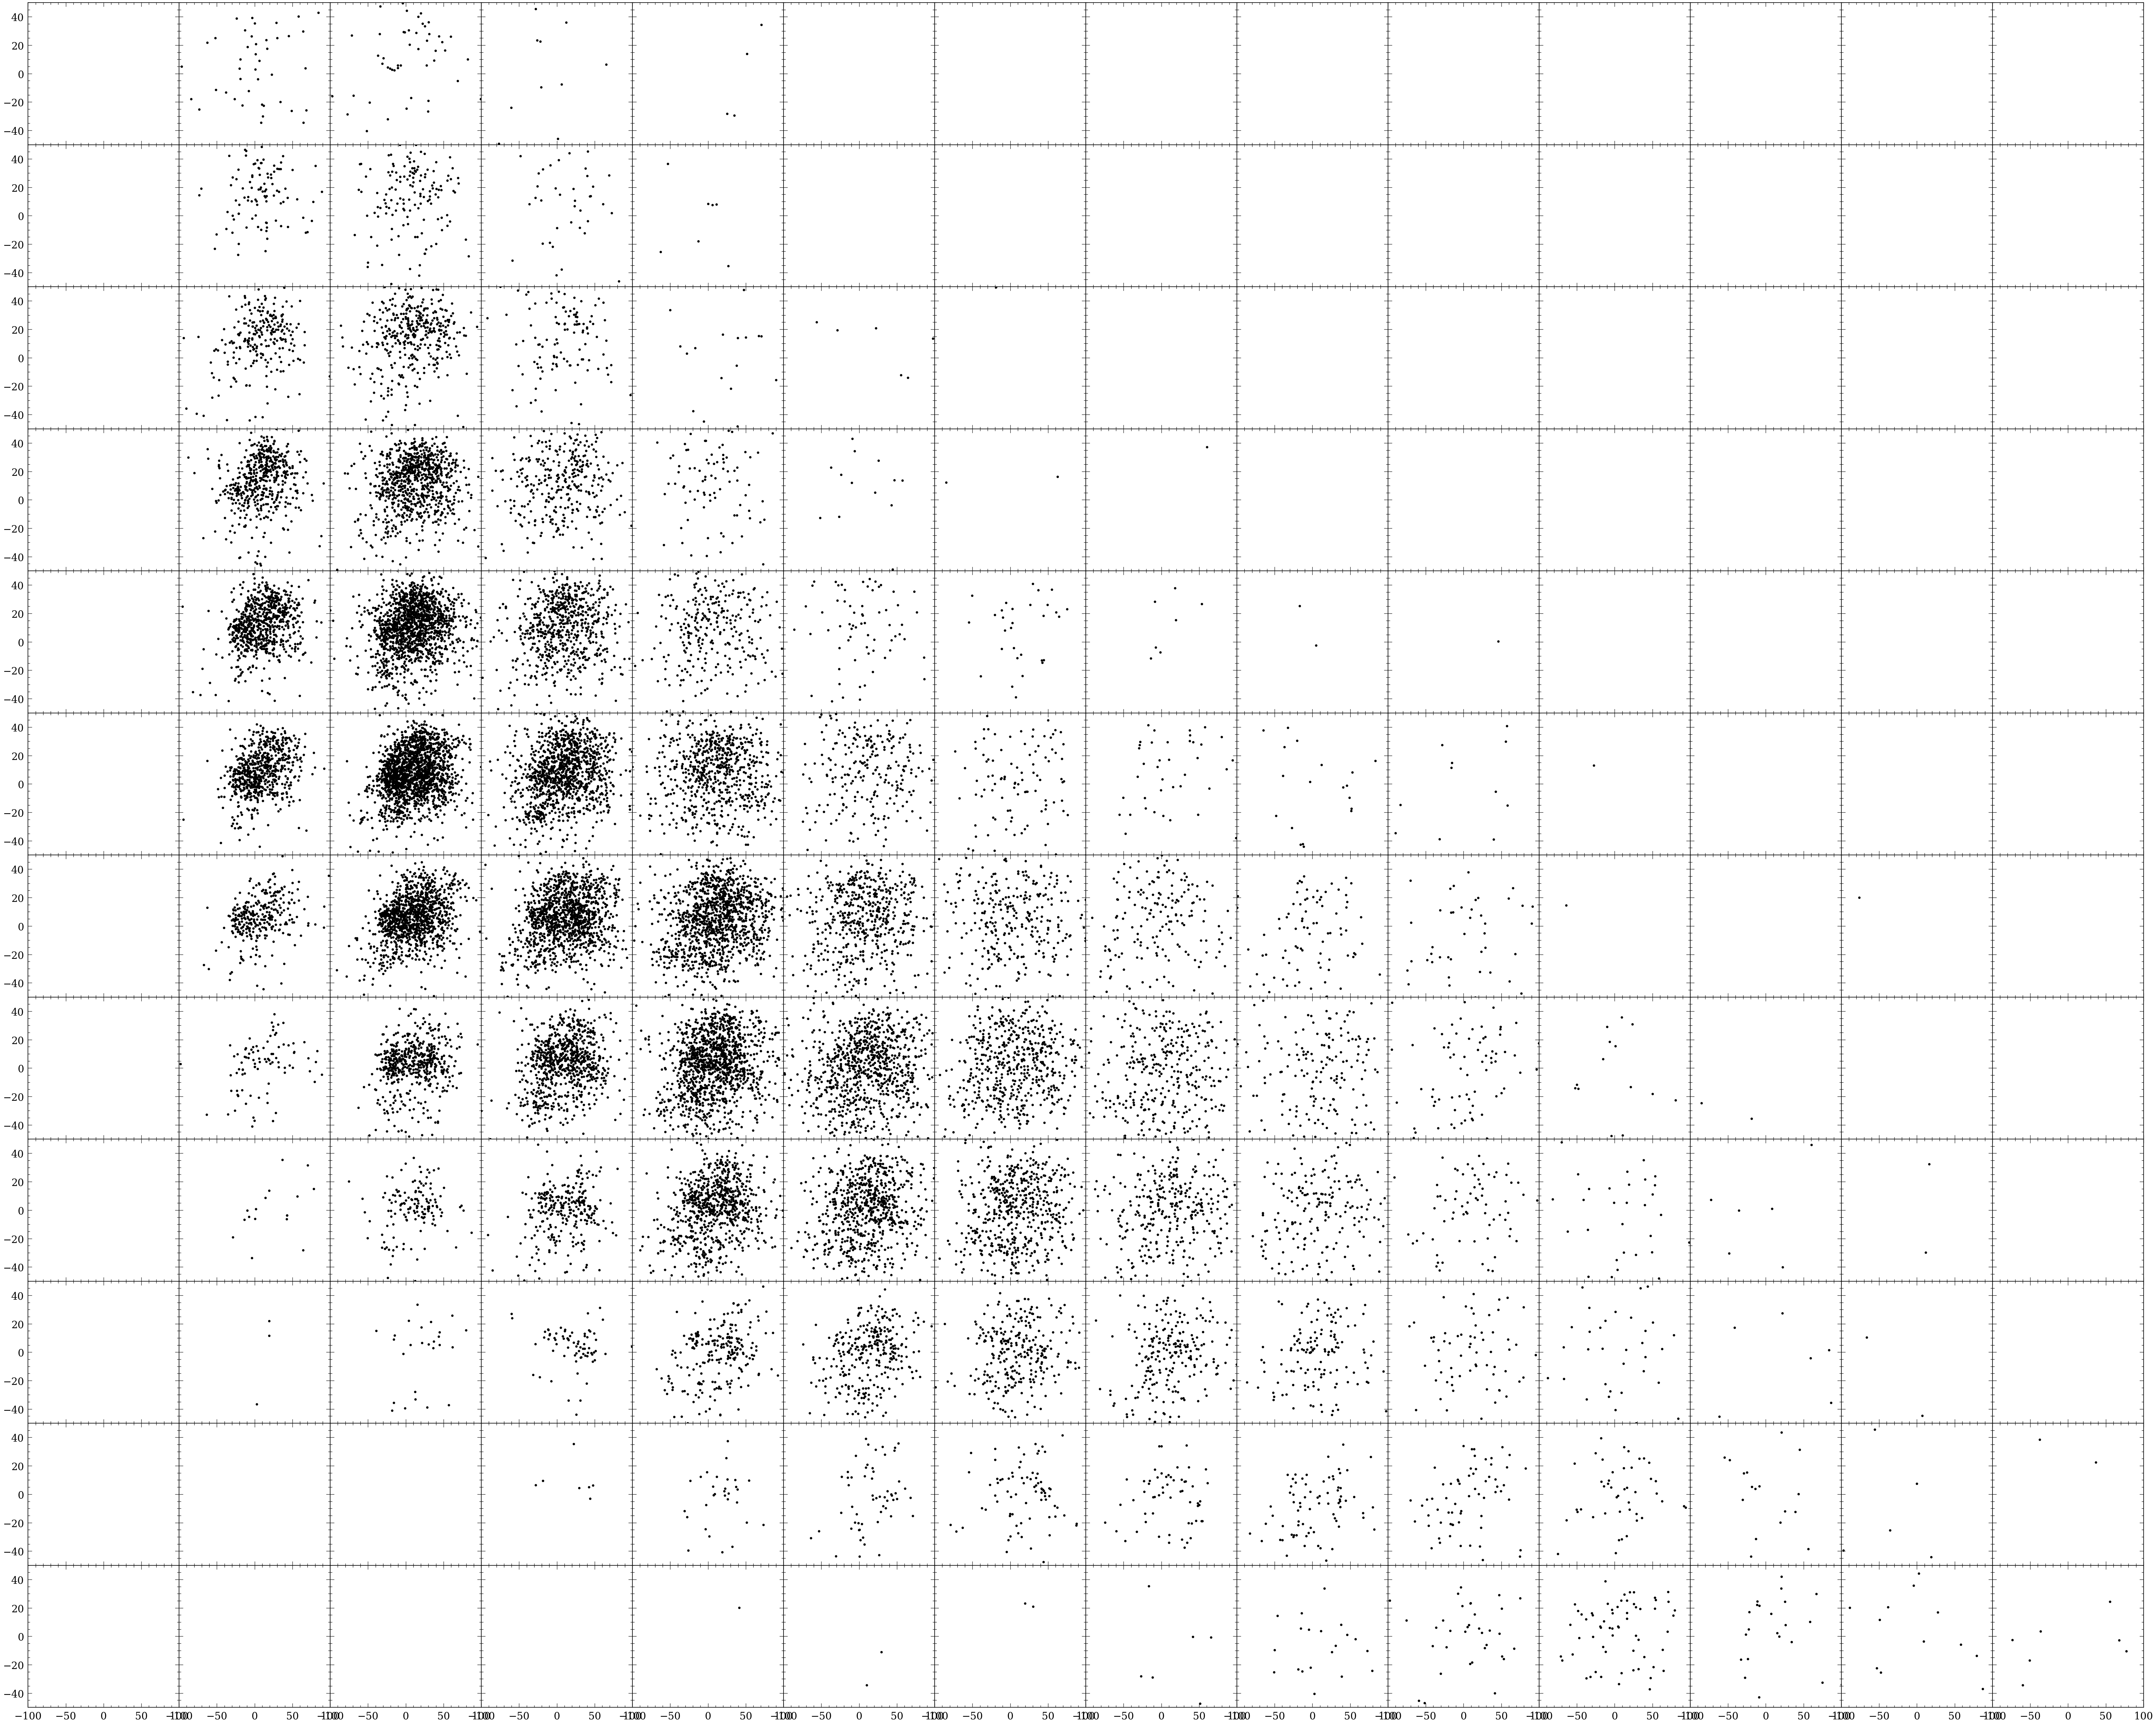

In [459]:
AgeRange = np.linspace(0,14,15)
RbRagne = np.linspace(0,12,13)

fig, plots = plt.subplots(len(RbRagne)-1, len(AgeRange)-1, 
                          figsize=(5*len(AgeRange), 5*(len(RbRagne)-1)),
                         sharex=True, sharey=True,
                          gridspec_kw = {'wspace':0, 'hspace':0})
for i in range(len(AgeRange)-1):
    m = (ztfstars['gyroAge']>AgeRange[i])&(ztfstars['gyroAge']<AgeRange[i+1])
    for j in range(len(RbRagne)-1):
        m2 = m&(ztfstars['Rb']>RbRagne[j])&(ztfstars['Rb']<RbRagne[j+1])
        if sum(m2)==0:
            continue
        plots[len(RbRagne)-j-2, i].plot(ztfstars[m2]['vx'], ztfstars[m2]['vy']-220, 'k.',
                            markersize=10)
        plots[len(RbRagne)-j-2, i].set_xlim([-100,100])
        plots[len(RbRagne)-j-2, i].set_ylim([-50,50])
        #plots[len(RbRagne)-j-2, i].set_title('%.1f < $R_b$ < %.1f; %.1f < Age < %.1f'%(RbRagne[j],RbRagne[j+1],AgeRange[i],AgeRange[i+1]), fontsize=25)

fig.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.savefig('kinematic.png')


100%|███████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 2229.91it/s]


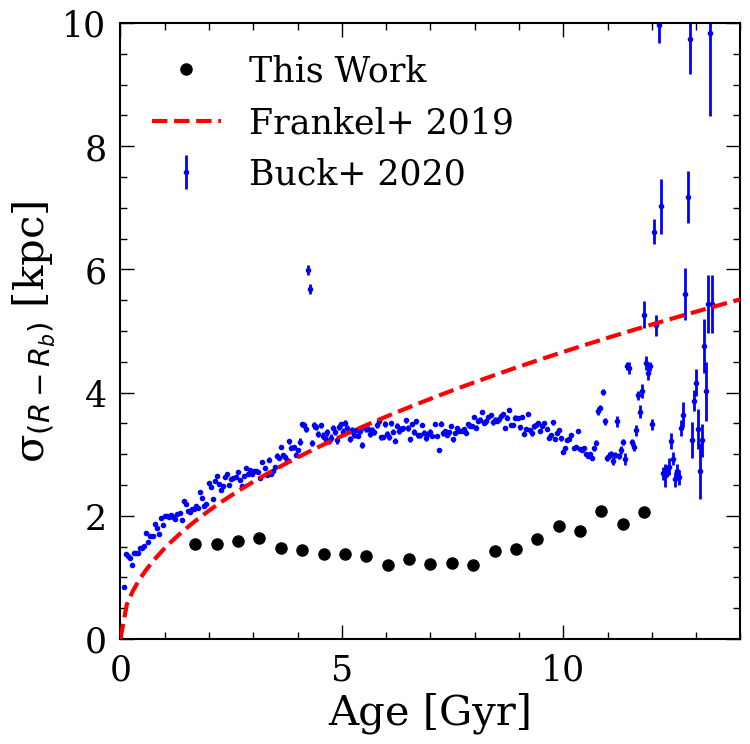

In [46]:
import astropy.uncertainty as unc


agebincalc_rm = np.linspace(0,14,30)
mean_dr = np.zeros(len(agebincalc_rm)-1)

ztfstars['AGE_sca'] = ztfstars['gyroAge']
ztfstars = ztfstars.loc[ztfstars['Rb']<20]
ztfstars = ztfstars.loc[ztfstars['mh_xgboost']>-1]
ztfstars = ztfstars.loc[abs(ztfstars['R']-8.2)<0.2]

for i in trange(len(agebincalc_rm)-1):
    sub_tryRb_sing = ztfstars.loc[(ztfstars['AGE_sca']>agebincalc_rm[i])&(ztfstars['AGE_sca']<agebincalc_rm[i+1])]
    
    if len(sub_tryRb_sing)<50:
        mean_dr[i] = np.nan
        continue
        
    
    #drdist = 1.5*(np.median(abs(sub_tryRb_sing['Rb']-sub_tryRb_sing['R'])))
    drdist = (np.std((sub_tryRb_sing['Rb']-sub_tryRb_sing['R'])))
    
    mean_dr[i] = np.mean(drdist)
    
    
plt.figure(figsize=(8,8))
dR_sim = pd.read_pickle('../FeHGrad/BuckMigration.pkl')

plt.plot((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_dr,
             'ko', label='This Work', 
            markersize=8)
plt.plot(np.linspace(0,14,100), 
         3.9*np.sqrt(np.linspace(0,14,100)/7), 
         'r--', label='Frankel+ 2019', zorder=10,
        linewidth=3)

m = (dR_sim['NoS']>30)
plt.errorbar(dR_sim['meanage'][m], dR_sim['meandR'][m],
             yerr=dR_sim['meadR_err'][m], fmt='bo', 
             label='Buck+ 2020', markersize=3)

plt.xlim([0,14])
plt.ylim([0,10])
plt.xlabel('Age [Gyr]')
plt.ylabel('σ$_{(R-R_b)}$ [kpc]')
plt.legend()

plt.savefig('migrationStr.png',bbox_inches='tight')

In [53]:
def avr(age, r, vz, rbin=np.linspace(6,12,4), agebin=np.linspace(0,14,10),Nostar=100):
    colors = getcolor(range(len(rbin)+1))
    avrs = np.zeros((len(rbin)-1, len(agebin)-1))
    overallvz = np.zeros(len(agebin)-1)
    
    for i in range(len(rbin)-1):
        m = (r>rbin[i])&(r<rbin[i+1])
        age_r, r_r, vz_r = age[m], r[m], vz[m]
        for j in range(len(agebin)-1):
            m2 = (age_r>agebin[j])&(age_r<agebin[j+1])
            if sum(m2)<Nostar:
                avrs[i,j]=np.nan
            else:
                vz_r_age = vz_r[m2]
                #avrs[i,j] = 1.5*sum(abs(vz_r_age-np.median(vz_r_age)))/sum(m2)
                avrs[i,j] = np.std(vz_r_age)
                
    for i in range(len(agebin)-1):
        m = (age>agebin[i])&(age<agebin[i+1])
        if sum(m)<Nostar:
            overallvz[i] = np.nan
        else:
            overallvz[i] = np.std(vz[m])
        
                
    
    return (agebin[:-1]+agebin[1:])/2, (rbin[:-1]+rbin[1:])/2, avrs, overallvz



In [463]:
ages, rs, avrs_z, overall_z = avr(ztfstars['Rb'].values, ztfstars['gyroAge'].values,
                       ztfstars['vz'].values, 
                     rbin=np.linspace(0,12,4), agebin=np.linspace(2,20,30))

ages, rs, avrs_phi, overall_phi = avr(ztfstars['Rb'].values, ztfstars['gyroAge'].values,
                         ztfstars['vphi'].values, 
                     rbin=np.linspace(0,12,4), agebin=np.linspace(2,20,30))

ages, rs, avrs_r, overall_r = avr(ztfstars['Rb'].values, ztfstars['gyroAge'].values,
                       ztfstars['vr'].values, 
                     rbin=np.linspace(0,12,4), agebin=np.linspace(2,20,30))



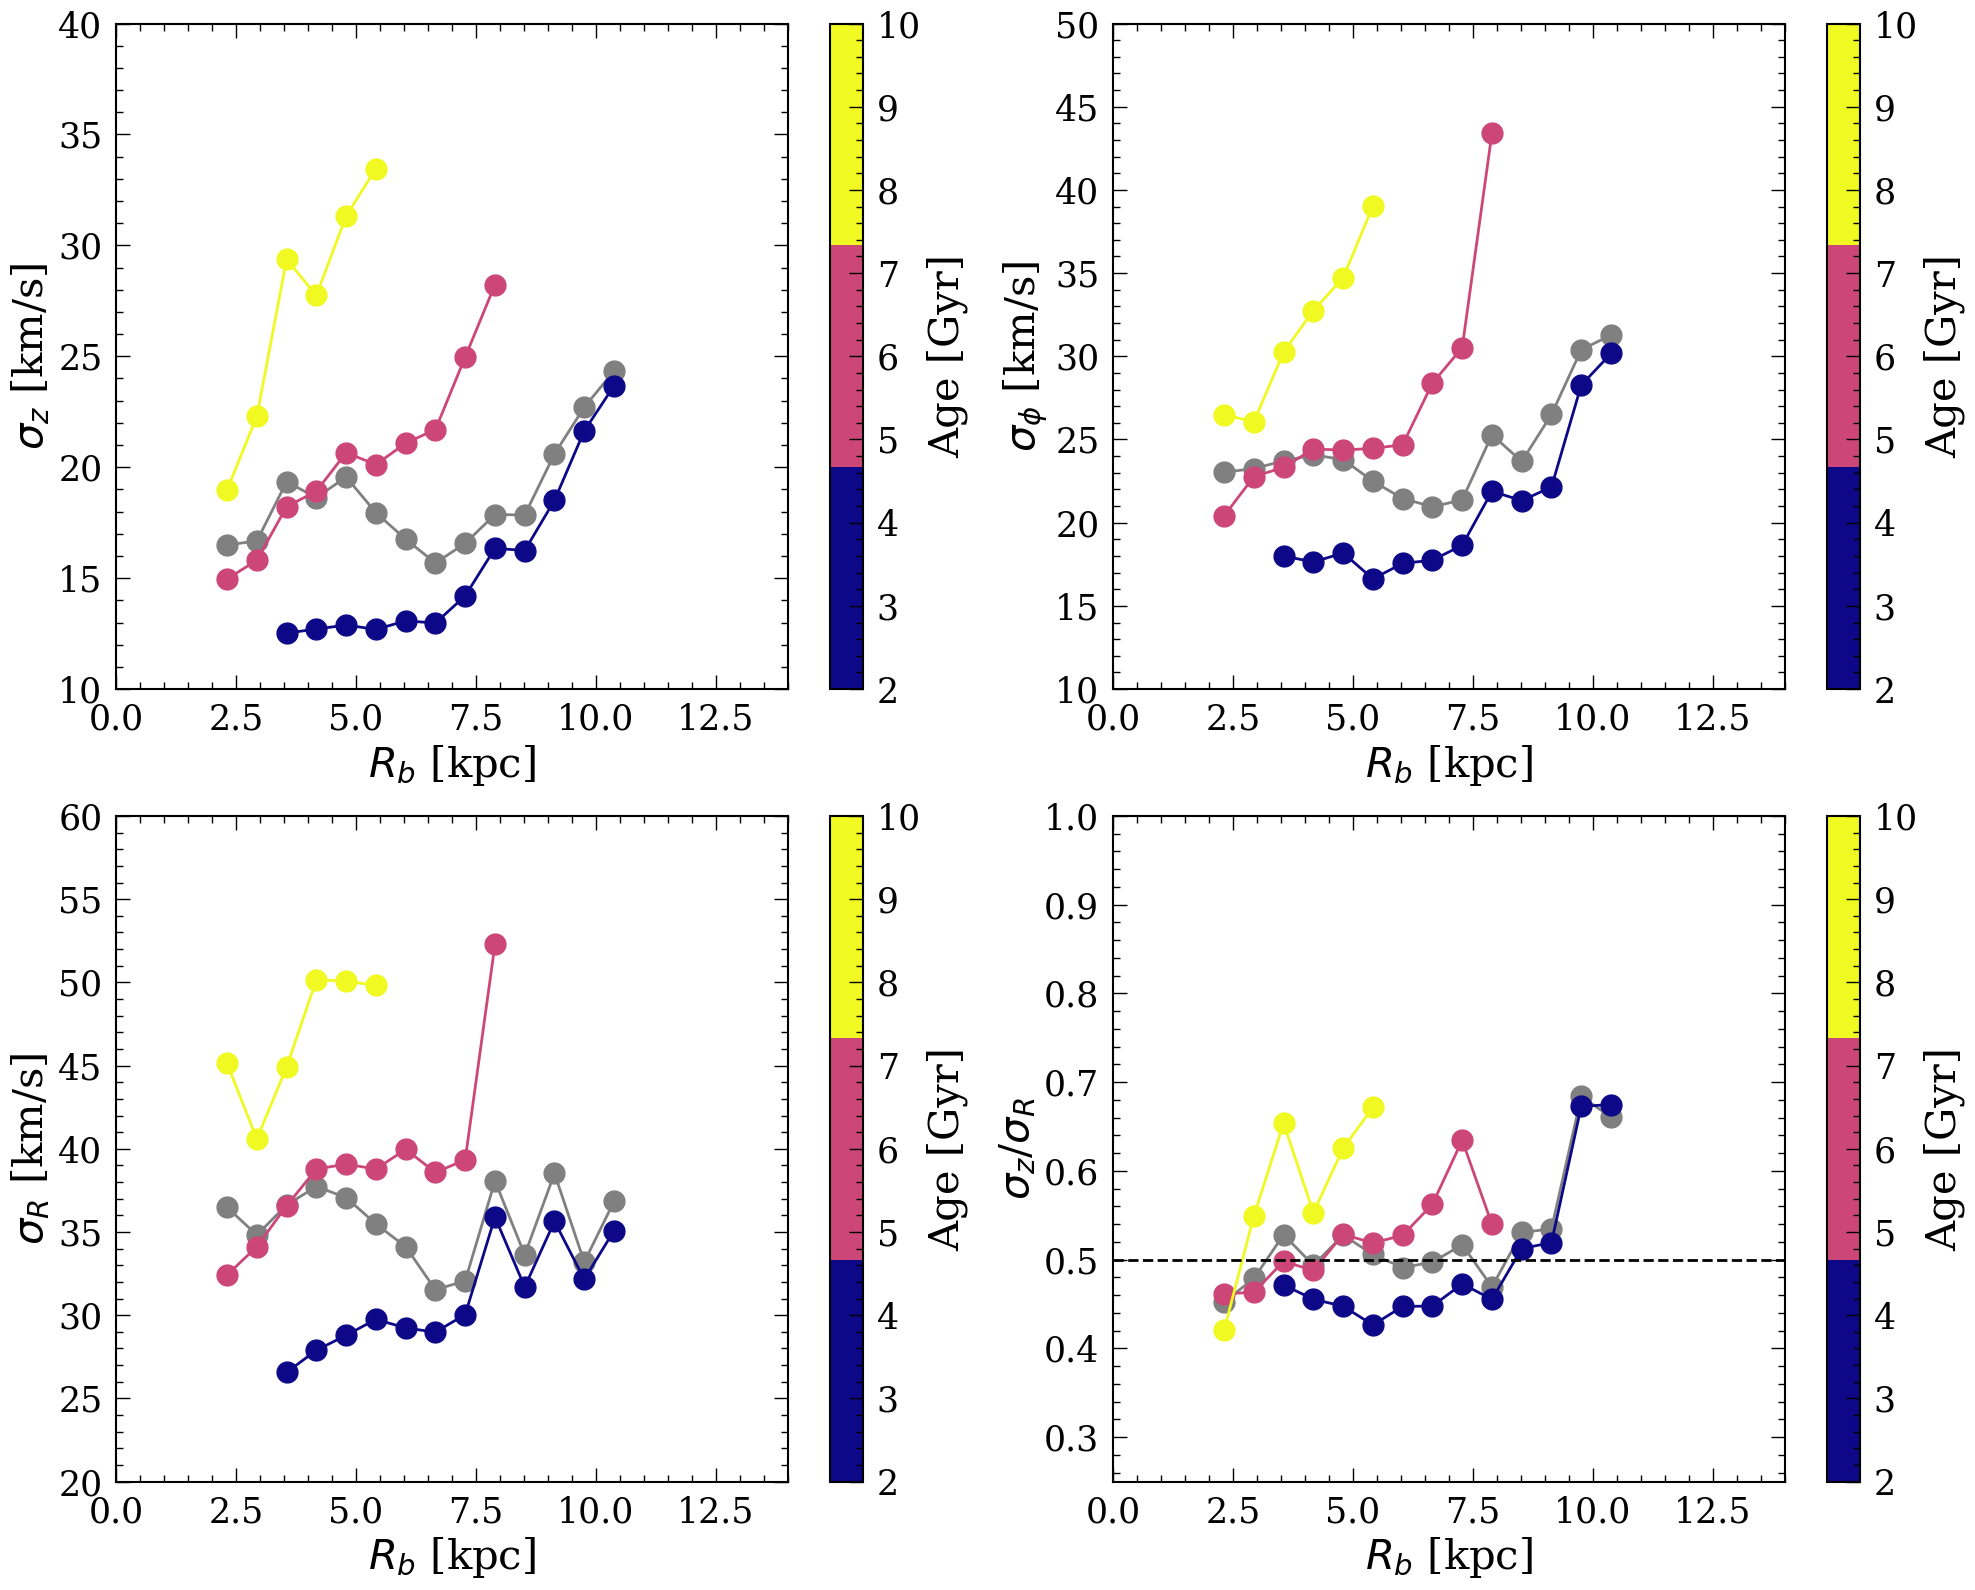

In [464]:

colors = getcolor(np.linspace(2,12,3))

plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
plt.plot(ages, overall_z, 'o-', color='grey', label='All',
            markersize=15)

for i in range(len(rs)):
    plt.plot(ages, avrs_z[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
    plt.xlabel('$R_b$ [kpc]')
    plt.ylabel('$σ_z$ [km/s]')
plt.scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap=plt.get_cmap('plasma',3))
plt.ylim([10, 40])
plt.xlim([0,14])
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
#plt.legend()


plt.subplot(2,2,2)
plt.plot(ages, overall_phi, 'o-', color='grey', label='All',
            markersize=15)
for i in range(len(rs)):
    plt.plot(ages, avrs_phi[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
    plt.xlabel('$R_b$ [kpc]')
    plt.ylabel('$σ_ϕ$ [km/s]')
plt.ylim([10, 50])
plt.xlim([0,14])
plt.scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap=plt.get_cmap('plasma',3))
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
#plt.legend()



plt.subplot(2,2,3)
plt.plot(ages, overall_r, 'o-', color='grey', label='All',
            markersize=15)
for i in range(len(rs)):
    plt.plot(ages, avrs_r[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
    plt.xlabel('$R_b$ [kpc]')
    plt.ylabel('$σ_R$ [km/s]')
plt.ylim([20, 60])
plt.xlim([0,14])
plt.scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap=plt.get_cmap('plasma',3))
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
#plt.legend()



plt.subplot(2,2,4)
plt.plot(ages, overall_z/overall_r, 'o-', color='grey', label='All',
            markersize=15)

for i in range(len(rs)):
    plt.plot(ages, avrs_z[i,:]/avrs_r[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
    plt.xlabel('$R_b$ [kpc]')
    plt.ylabel('$σ_z$/$σ_R$')
plt.ylim([0.25, 1])
plt.xlim([0,14])
plt.scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap=plt.get_cmap('plasma',3))
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
#plt.legend()

plt.plot([0,16], [0.5,0.5], 'k--')



plt.tight_layout()

In [465]:
#sub['Rmean'] = (sub['R_PERI']+sub['R_APO'])/2

ages, rs, avrs_z, overall_z = avr(ztfstars['gyroAge'].values, ztfstars['Rb'].values, 
                       ztfstars['vz'].values, 
                     rbin=np.linspace(0,15,4), agebin=np.linspace(0,12,20))

ages, rs, avrs_phi, overall_phi = avr(ztfstars['gyroAge'].values, ztfstars['Rb'].values, 
                         ztfstars['vphi'].values, 
                     rbin=np.linspace(2,15,4), agebin=np.linspace(0,12,20))

ages, rs, avrs_r, overall_r = avr(ztfstars['gyroAge'].values, ztfstars['Rb'].values, 
                       ztfstars['vr'].values, 
                     rbin=np.linspace(2,15,4), agebin=np.linspace(0,12,20))



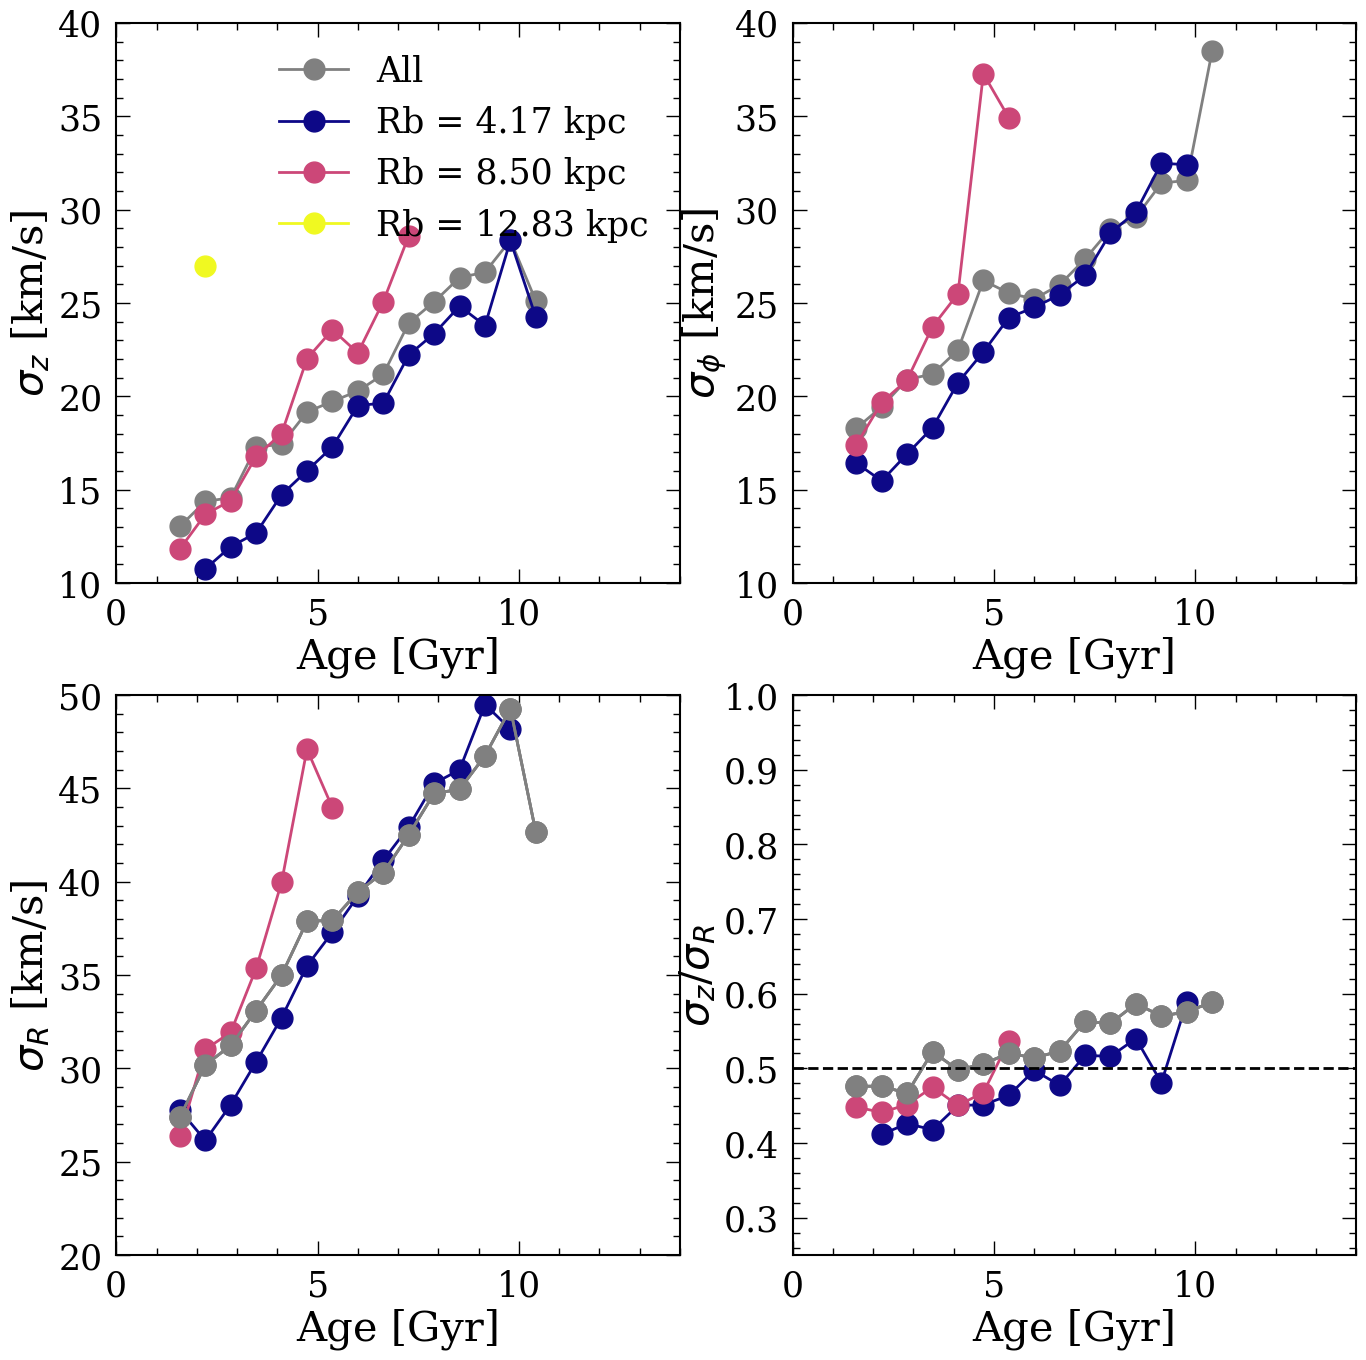

In [466]:


plt.figure(figsize=(16,16))
colors = getcolor(rs)
plt.subplot(2,2,1)
plt.plot(ages, overall_z, 'o-', color='grey', label='All',
            markersize=15)
for i in range(len(rs)):
    plt.plot(ages, avrs_z[i,:], 'o-', color=colors[i], label='Rb = %.2f kpc'%rs[i],
            markersize=15)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('$σ_z$ [km/s]')
plt.ylim([10, 40])
plt.xlim([0,14])
plt.legend()



plt.subplot(2,2,2)
plt.plot(ages, overall_phi, 'o-', color='grey', label='All',
            markersize=15)
for i in range(len(rs)):
    plt.plot(ages, avrs_phi[i,:], 'o-', color=colors[i], label='Rb = %.2f kpc'%rs[i],
            markersize=15)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('$σ_ϕ$ [km/s]')
plt.ylim([10, 40])
plt.xlim([0,14])



plt.subplot(2,2,3)
for i in range(len(rs)):
    plt.plot(ages, overall_r, 'o-', color='grey', label='All',
            markersize=15)
    plt.plot(ages, avrs_r[i,:], 'o-', color=colors[i], label='Rb = %.2f kpc'%rs[i],
            markersize=15)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('$σ_R$ [km/s]')
plt.ylim([20, 50])
plt.xlim([0,14])



plt.subplot(2,2,4)
for i in range(len(rs)):
    plt.plot(ages, overall_z/overall_r, 'o-', color='grey', label='All',
            markersize=15)
    plt.plot(ages, avrs_z[i,:]/avrs_r[i,:], 'o-', color=colors[i], label='Rb = %.2f kpc'%rs[i],
            markersize=15)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('$σ_z$/$σ_R$')
plt.ylim([0.25, 1])
plt.xlim([0,14])

plt.plot([0,16], [0.5,0.5], 'k--')







20443


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 1090.30it/s]


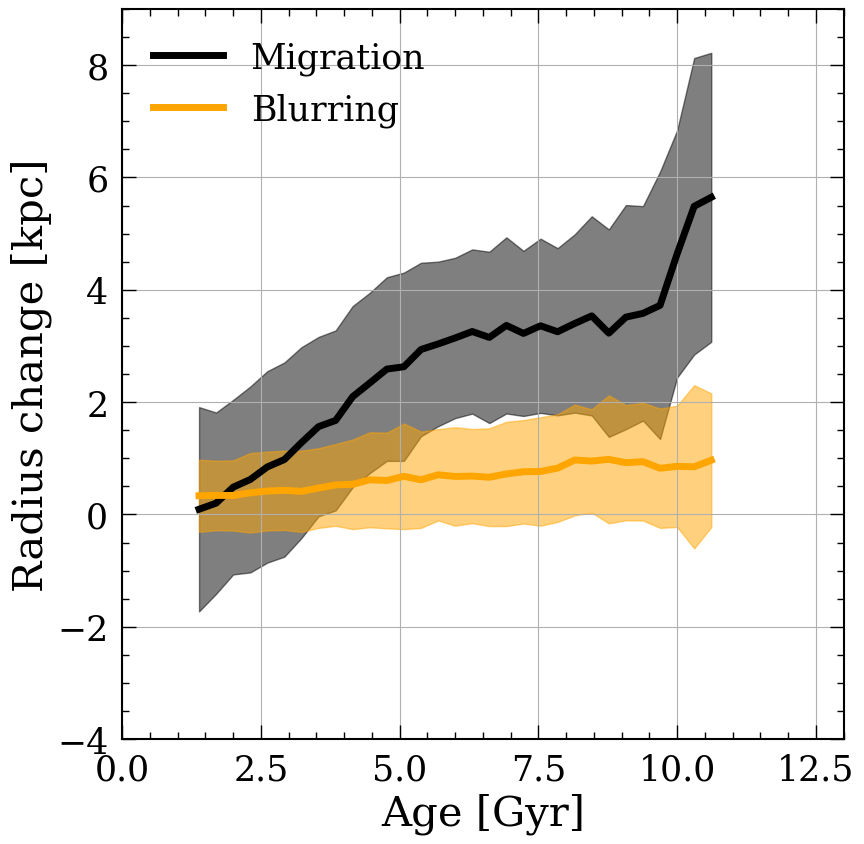

In [468]:
import astropy.uncertainty as unc

agebincalc_rm = np.linspace(0,12,40)
sub_tryRb_sub_all = ztfstars.loc[abs(ztfstars['Rg'])<20]
sub_tryRb_sub_all = sub_tryRb_sub_all.loc[abs(sub_tryRb_sub_all['R']-8.2)<0.2]
sub_tryRb_sub_all = sub_tryRb_sub_all.loc[sub_tryRb_sub_all['Rb']<20]
sub_tryRb_sub_all = sub_tryRb_sub_all.loc[sub_tryRb_sub_all['mh_xgboost']>-1]

plt.figure(figsize=(16,16))
count = 1

sub_tryRb_sub = sub_tryRb_sub_all
print(len(sub_tryRb_sub))

mean_dr = np.zeros(len(agebincalc_rm)-1)
std_dr = np.zeros(len(agebincalc_rm)-1)

mean_blr = np.zeros(len(agebincalc_rm)-1)
std_blr = np.zeros(len(agebincalc_rm)-1)

for i in trange(len(agebincalc_rm)-1):
    sub_tryRb_sing = sub_tryRb_sub.loc[(sub_tryRb_sub['gyroAge']>agebincalc_rm[i])&(sub_tryRb_sub['gyroAge']<agebincalc_rm[i+1])]

    sub_tryRb_sing = sub_tryRb_sing.dropna(subset=['Rb','Rg'])

    if len(sub_tryRb_sing)<50:
        mean_dr[i] = np.nan
        std_dr[i] = np.nan

        mean_blr[i] = np.nan
        std_blr[i] = np.nan
        continue

    mean_dr[i] = np.mean(sub_tryRb_sing['Rg']-sub_tryRb_sing['Rb'])
    std_dr[i] = np.std(sub_tryRb_sing['Rg']-sub_tryRb_sing['Rb'])
    mean_blr[i] = np.mean(sub_tryRb_sing['R']-sub_tryRb_sing['Rg'])
    std_blr[i] = np.std(sub_tryRb_sing['R']-sub_tryRb_sing['Rg'])


plt.subplot(2,2,count)
"""plt.errorbar((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_dr,
             yerr=std_dr, fmt='.',  color='k', alpha=0.5,
            linewidth=10)"""
plt.plot((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_dr,'-',
         color='k', linewidth=5, label='Migration')
plt.fill_between((agebincalc_rm[1:]+agebincalc_rm[:-1])/2,
                mean_dr-std_dr, mean_dr+std_dr,color='k',
                alpha=0.5)

"""plt.errorbar((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_blr,
             yerr=std_blr, fmt='.',  color='orange', alpha=0.5,
            linewidth=10)"""
plt.plot((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_blr,'-',
         color='orange', linewidth=5, label='Blurring')
plt.fill_between((agebincalc_rm[1:]+agebincalc_rm[:-1])/2,
                mean_blr-std_blr, mean_blr+std_blr,color='orange',
                alpha=0.5)
plt.grid()

plt.xlim([0,13])
plt.ylim([-4,9])
plt.xlabel('Age [Gyr]')
plt.ylabel('Radius change [kpc]')
plt.legend(loc=2)
plt.tight_layout()

plt.savefig('migrationStr.png',bbox_inches='tight')

Text(0, 0.5, '$R_g-R_b$ [kpc]')

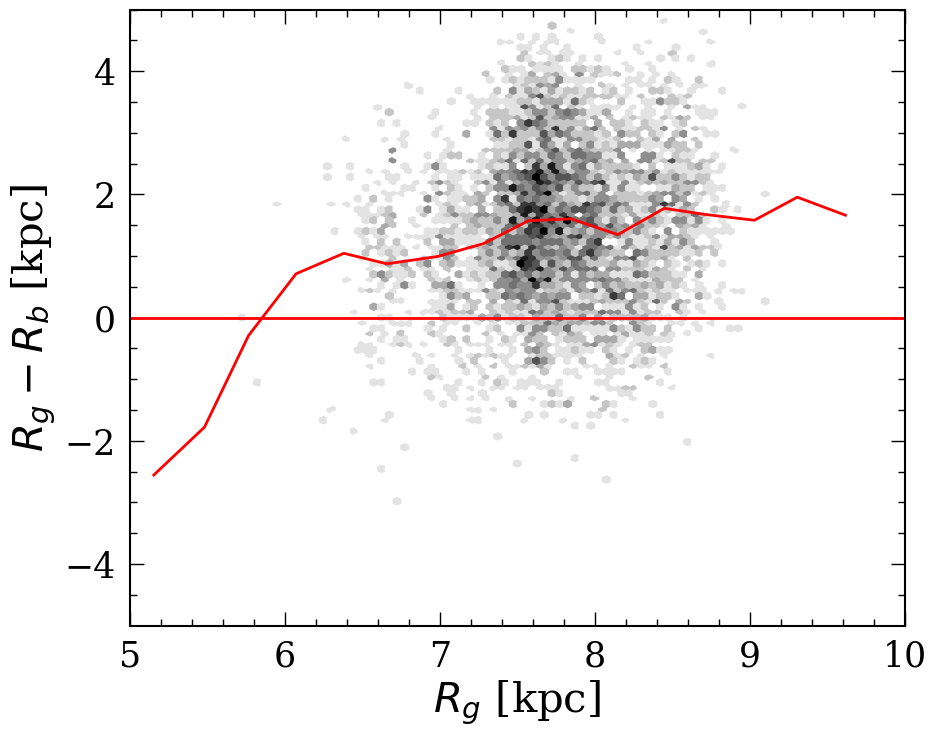

In [500]:
plt.figure(figsize=(10,8))
sub_tryRb_plt = ztfstars.loc[ztfstars['gyroAge']<5]
plt.hexbin(sub_tryRb_plt['Rg'], sub_tryRb_plt['Rg']-sub_tryRb_plt['Rb'], 
           cmap=plt.get_cmap('binary', 10),
          extent=(5,10,-5,5),reduce_C_function=np.mean,
          mincnt=1)
sub_tryRb_plt = sub_tryRb_plt.sort_values('Rg').reset_index(drop=True)
sub_tryRb_plt = sub_tryRb_plt.loc[(sub_tryRb_plt['Rg']>5)&(sub_tryRb_plt['Rg']<10)]
rg_m, dr_m = movingMed_time(sub_tryRb_plt['Rg'], 
                            sub_tryRb_plt['Rg']-sub_tryRb_plt['Rb'],
              0.1,0.3)
rg_m, dr_m = rg_m[~(dr_m==0)], dr_m[~(dr_m==0)]
plt.plot(rg_m, dr_m, 'r-')
plt.plot([0,15],[0,0],'r-')
plt.xlim([5, 10])
plt.ylim([-5,5])
plt.xlabel('$R_g$ [kpc]')
plt.ylabel('$R_g-R_b$ [kpc]')
#plt.colorbar(label='Age [Gyr]')

# Simulation

In [47]:
df_sim = pd.read_pickle('../NIHAORbirth/g2.79e12_z_0_decomp.pkl')
vscale = 240/340
rscale = 3.5/5.6
df_sim['vx'] = df_sim['vx']*vscale
df_sim['vy'] = df_sim['vy']*vscale
df_sim['vz'] = df_sim['vz']*vscale

df_sim['R'] = df_sim['R']*rscale
df_sim['Rg'] = df_sim['Rg']*rscale
df_sim['Rb'] = df_sim['Rbir']*rscale
df_sim['x'] = df_sim['x']*rscale
df_sim['y'] = df_sim['y']*rscale
df_sim['z'] = df_sim['z']*rscale

df_sim['vr'] = -(df_sim['x'] * df_sim['vx'] + df_sim['y'] * df_sim['vy'])/df_sim['R']
df_sim['vphi'] = -(df_sim['x'] * df_sim['vy'] - df_sim['y'] * df_sim['vx'])/df_sim['R']



print(len(df_sim)), df_sim.columns

6672510


(None,
 Index(['z', 'metals', 'rxy', 'y', 'mass', 'eps', 'x', 'phi', 'j_circ', 'ke',
        'te', 'decomp', 'j_x', 'j_y', 'tform', 'iord', 'j_z', 'vy', 'vz',
        'vcxy', 'jz_by_jzcirc', 'vx', 'ofe', 'feh', 'age', 'Rbir', 'zbir', 'R',
        'dR', 'dz', 'vc', 'Rg', 'Rb', 'vr', 'vphi'],
       dtype='object'))

In [78]:
merger = pd.read_pickle('../FeHGrad/g2.79e12_merger_Lucy.dat')
merger = pd.DataFrame(np.array((merger['time'], merger['vir_ratio'])).T,
                      columns=['time','ratio'])
merger['time'] = 13.8-merger['time']

83531
83161


100%|████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 667.07it/s]


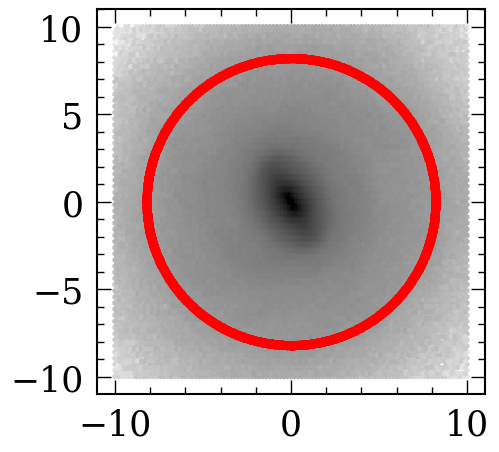

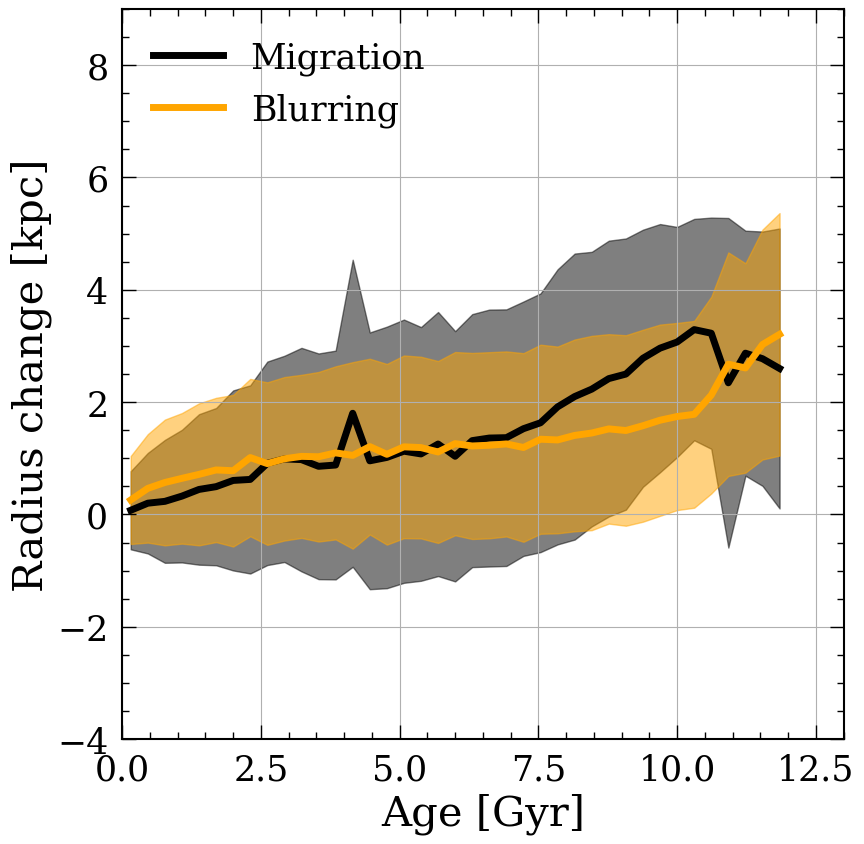

In [84]:
import astropy.uncertainty as unc
import math

agebincalc_rm = np.linspace(0,12,40)
sub_tryRb_sub_all = df_sim.loc[abs(df_sim['Rg'])<20]

selR = 8.2
selang = -50

selx = selR*np.cos(selang/180*np.pi)
sely = selR*np.sin(selang/180*np.pi)

#sub_tryRb_sub_all = sub_tryRb_sub_all.loc[np.sqrt((sub_tryRb_sub_all['x']-8.2)**2+(sub_tryRb_sub_all['y'])**2)<1]
#sub_tryRb_sub_all = sub_tryRb_sub_all.loc[np.sqrt((sub_tryRb_sub_all['x']-selx)**2+(sub_tryRb_sub_all['y']-sely)**2)<1]
sub_tryRb_sub_all = sub_tryRb_sub_all.loc[abs(sub_tryRb_sub_all['R']-8.2)<0.2]

print(len(sub_tryRb_sub_all))
sub_tryRb_sub_all = sub_tryRb_sub_all.loc[sub_tryRb_sub_all['Rb']<20]
sub_tryRb_sub_all = sub_tryRb_sub_all.loc[sub_tryRb_sub_all['feh']>-1]


plt.figure(figsize=(5,5))
plt.hexbin(df_sim['x'],df_sim['y'], extent=(-10,10,-10,10),
          cmap='binary',bins='log')
plt.plot(sub_tryRb_sub_all['x'], sub_tryRb_sub_all['y'],' r.', markersize=1)



plt.figure(figsize=(16,16))
count = 1

sub_tryRb_sub = sub_tryRb_sub_all
print(len(sub_tryRb_sub))

mean_dr = np.zeros(len(agebincalc_rm)-1)
std_dr = np.zeros(len(agebincalc_rm)-1)

mean_blr = np.zeros(len(agebincalc_rm)-1)
std_blr = np.zeros(len(agebincalc_rm)-1)


for i in trange(len(agebincalc_rm)-1):
    sub_tryRb_sing = sub_tryRb_sub.loc[(sub_tryRb_sub['age']>agebincalc_rm[i])&(sub_tryRb_sub['age']<agebincalc_rm[i+1])]

    sub_tryRb_sing = sub_tryRb_sing.dropna(subset=['Rb','Rg'])

    if len(sub_tryRb_sing)<50:
        mean_dr[i] = np.nan
        std_dr[i] = np.nan

        mean_blr[i] = np.nan
        std_blr[i] = np.nan
        continue

    mean_dr[i] = np.mean(sub_tryRb_sing['Rg']-sub_tryRb_sing['Rb'])
    std_dr[i] = np.std(sub_tryRb_sing['Rg']-sub_tryRb_sing['Rb'])
    mean_blr[i] = np.mean(sub_tryRb_sing['R']-sub_tryRb_sing['Rg'])
    std_blr[i] = np.std(sub_tryRb_sing['R']-sub_tryRb_sing['Rg'])


plt.subplot(2,2,count)
"""plt.errorbar((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_dr,
             yerr=std_dr, fmt='.',  color='k', alpha=0.5,
            linewidth=10)"""
plt.plot((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_dr,'-',
         color='k', linewidth=5, label='Migration')
plt.fill_between((agebincalc_rm[1:]+agebincalc_rm[:-1])/2,
                mean_dr-std_dr, mean_dr+std_dr,color='k',
                alpha=0.5)

"""plt.errorbar((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_blr,
             yerr=std_blr, fmt='.',  color='orange', alpha=0.5,
            linewidth=10)"""
plt.plot((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_blr,'-',
         color='orange', linewidth=5, label='Blurring')
plt.fill_between((agebincalc_rm[1:]+agebincalc_rm[:-1])/2,
                mean_blr-std_blr, mean_blr+std_blr,color='orange',
                alpha=0.5)
plt.grid()

plt.xlim([0,13])
plt.ylim([-4,9])
plt.xlabel('Age [Gyr]')
plt.ylabel('Radius change [kpc]')
plt.legend(loc=2)
plt.tight_layout()

plt.savefig('migrationStr_sim.png',bbox_inches='tight')

<AxesSubplot:>

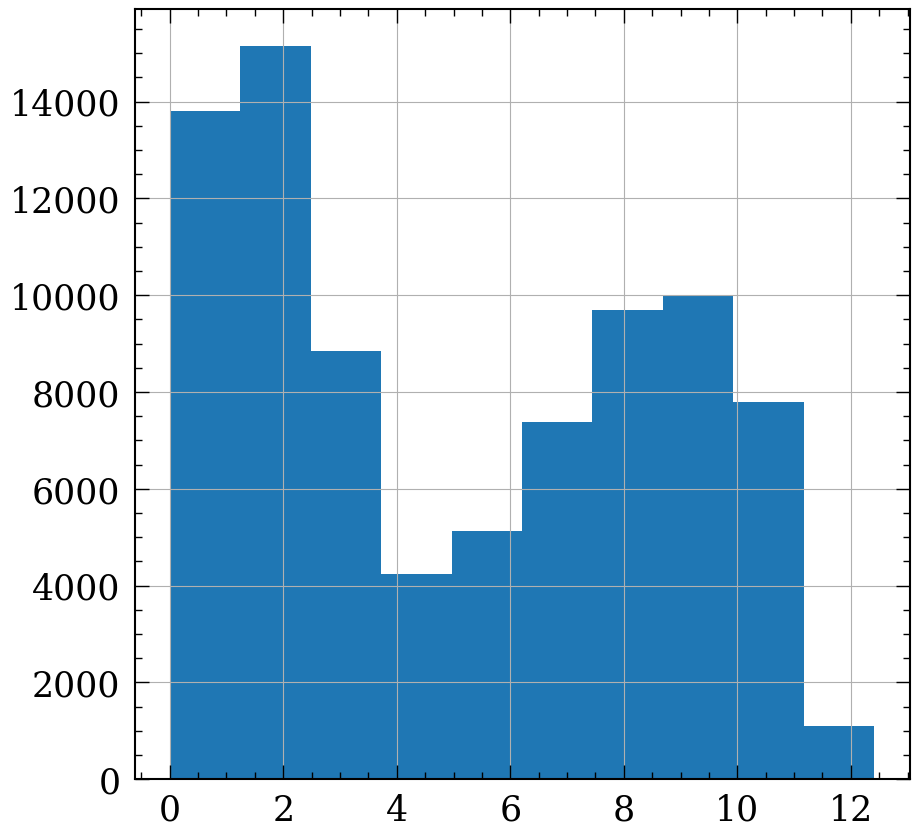

In [85]:
"""plt.hexbin(sub_tryRb_sub_all['age'],sub_tryRb_sub_all['Rb'], mincnt=1,
          gridsize=40)"""
sub_tryRb_sub_all['age'].hist()

In [86]:
"""plt.figure(figsize=(10,8))
sub_tryRb_plt = sub_tryRb_sub_all.loc[sub_tryRb_sub_all['age']<5]
plt.hexbin(sub_tryRb_plt['Rg'], sub_tryRb_plt['Rg']-sub_tryRb_plt['Rb'], 
           cmap=plt.get_cmap('binary', 10),
          extent=(5,10,-5,5),reduce_C_function=np.mean,
          mincnt=1)
sub_tryRb_plt = sub_tryRb_plt.sort_values('Rg').reset_index(drop=True)
sub_tryRb_plt = sub_tryRb_plt.loc[(sub_tryRb_plt['Rg']>5)&(sub_tryRb_plt['Rg']<10)]
rg_m, dr_m = movingMed_time(sub_tryRb_plt['Rg'], 
                            sub_tryRb_plt['Rg']-sub_tryRb_plt['Rb'],
              0.1,0.3)
rg_m, dr_m = rg_m[~(dr_m==0)], dr_m[~(dr_m==0)]
plt.plot(rg_m, dr_m, 'r-')
plt.plot([0,15],[0,0],'r-')
plt.xlim([5, 10])
plt.ylim([-5,5])
plt.xlabel('$R_g$ [kpc]')
plt.ylabel('$R_g-R_b$ [kpc]')
#plt.colorbar(label='Age [Gyr]')
"""

"plt.figure(figsize=(10,8))\nsub_tryRb_plt = sub_tryRb_sub_all.loc[sub_tryRb_sub_all['age']<5]\nplt.hexbin(sub_tryRb_plt['Rg'], sub_tryRb_plt['Rg']-sub_tryRb_plt['Rb'], \n           cmap=plt.get_cmap('binary', 10),\n          extent=(5,10,-5,5),reduce_C_function=np.mean,\n          mincnt=1)\nsub_tryRb_plt = sub_tryRb_plt.sort_values('Rg').reset_index(drop=True)\nsub_tryRb_plt = sub_tryRb_plt.loc[(sub_tryRb_plt['Rg']>5)&(sub_tryRb_plt['Rg']<10)]\nrg_m, dr_m = movingMed_time(sub_tryRb_plt['Rg'], \n                            sub_tryRb_plt['Rg']-sub_tryRb_plt['Rb'],\n              0.1,0.3)\nrg_m, dr_m = rg_m[~(dr_m==0)], dr_m[~(dr_m==0)]\nplt.plot(rg_m, dr_m, 'r-')\nplt.plot([0,15],[0,0],'r-')\nplt.xlim([5, 10])\nplt.ylim([-5,5])\nplt.xlabel('$R_g$ [kpc]')\nplt.ylabel('$R_g-R_b$ [kpc]')\n#plt.colorbar(label='Age [Gyr]')\n"

In [87]:
ages, rs, avrs_z, all_z = avr(sub_tryRb_sub_all['Rb'].values, sub_tryRb_sub_all['age'].values,
                       sub_tryRb_sub_all['vz'].values, 
                     rbin=np.linspace(2,12,5), agebin=np.linspace(2,20,40))

ages, rs, avrs_phi, all_phi = avr(sub_tryRb_sub_all['Rb'].values, sub_tryRb_sub_all['age'].values,
                         sub_tryRb_sub_all['vphi'].values, 
                     rbin=np.linspace(2,12,5), agebin=np.linspace(2,20,40))

ages, rs, avrs_r, all_r = avr(sub_tryRb_sub_all['Rb'].values, sub_tryRb_sub_all['age'].values,
                       sub_tryRb_sub_all['vr'].values, 
                     rbin=np.linspace(2,12,5), agebin=np.linspace(2,20,40))



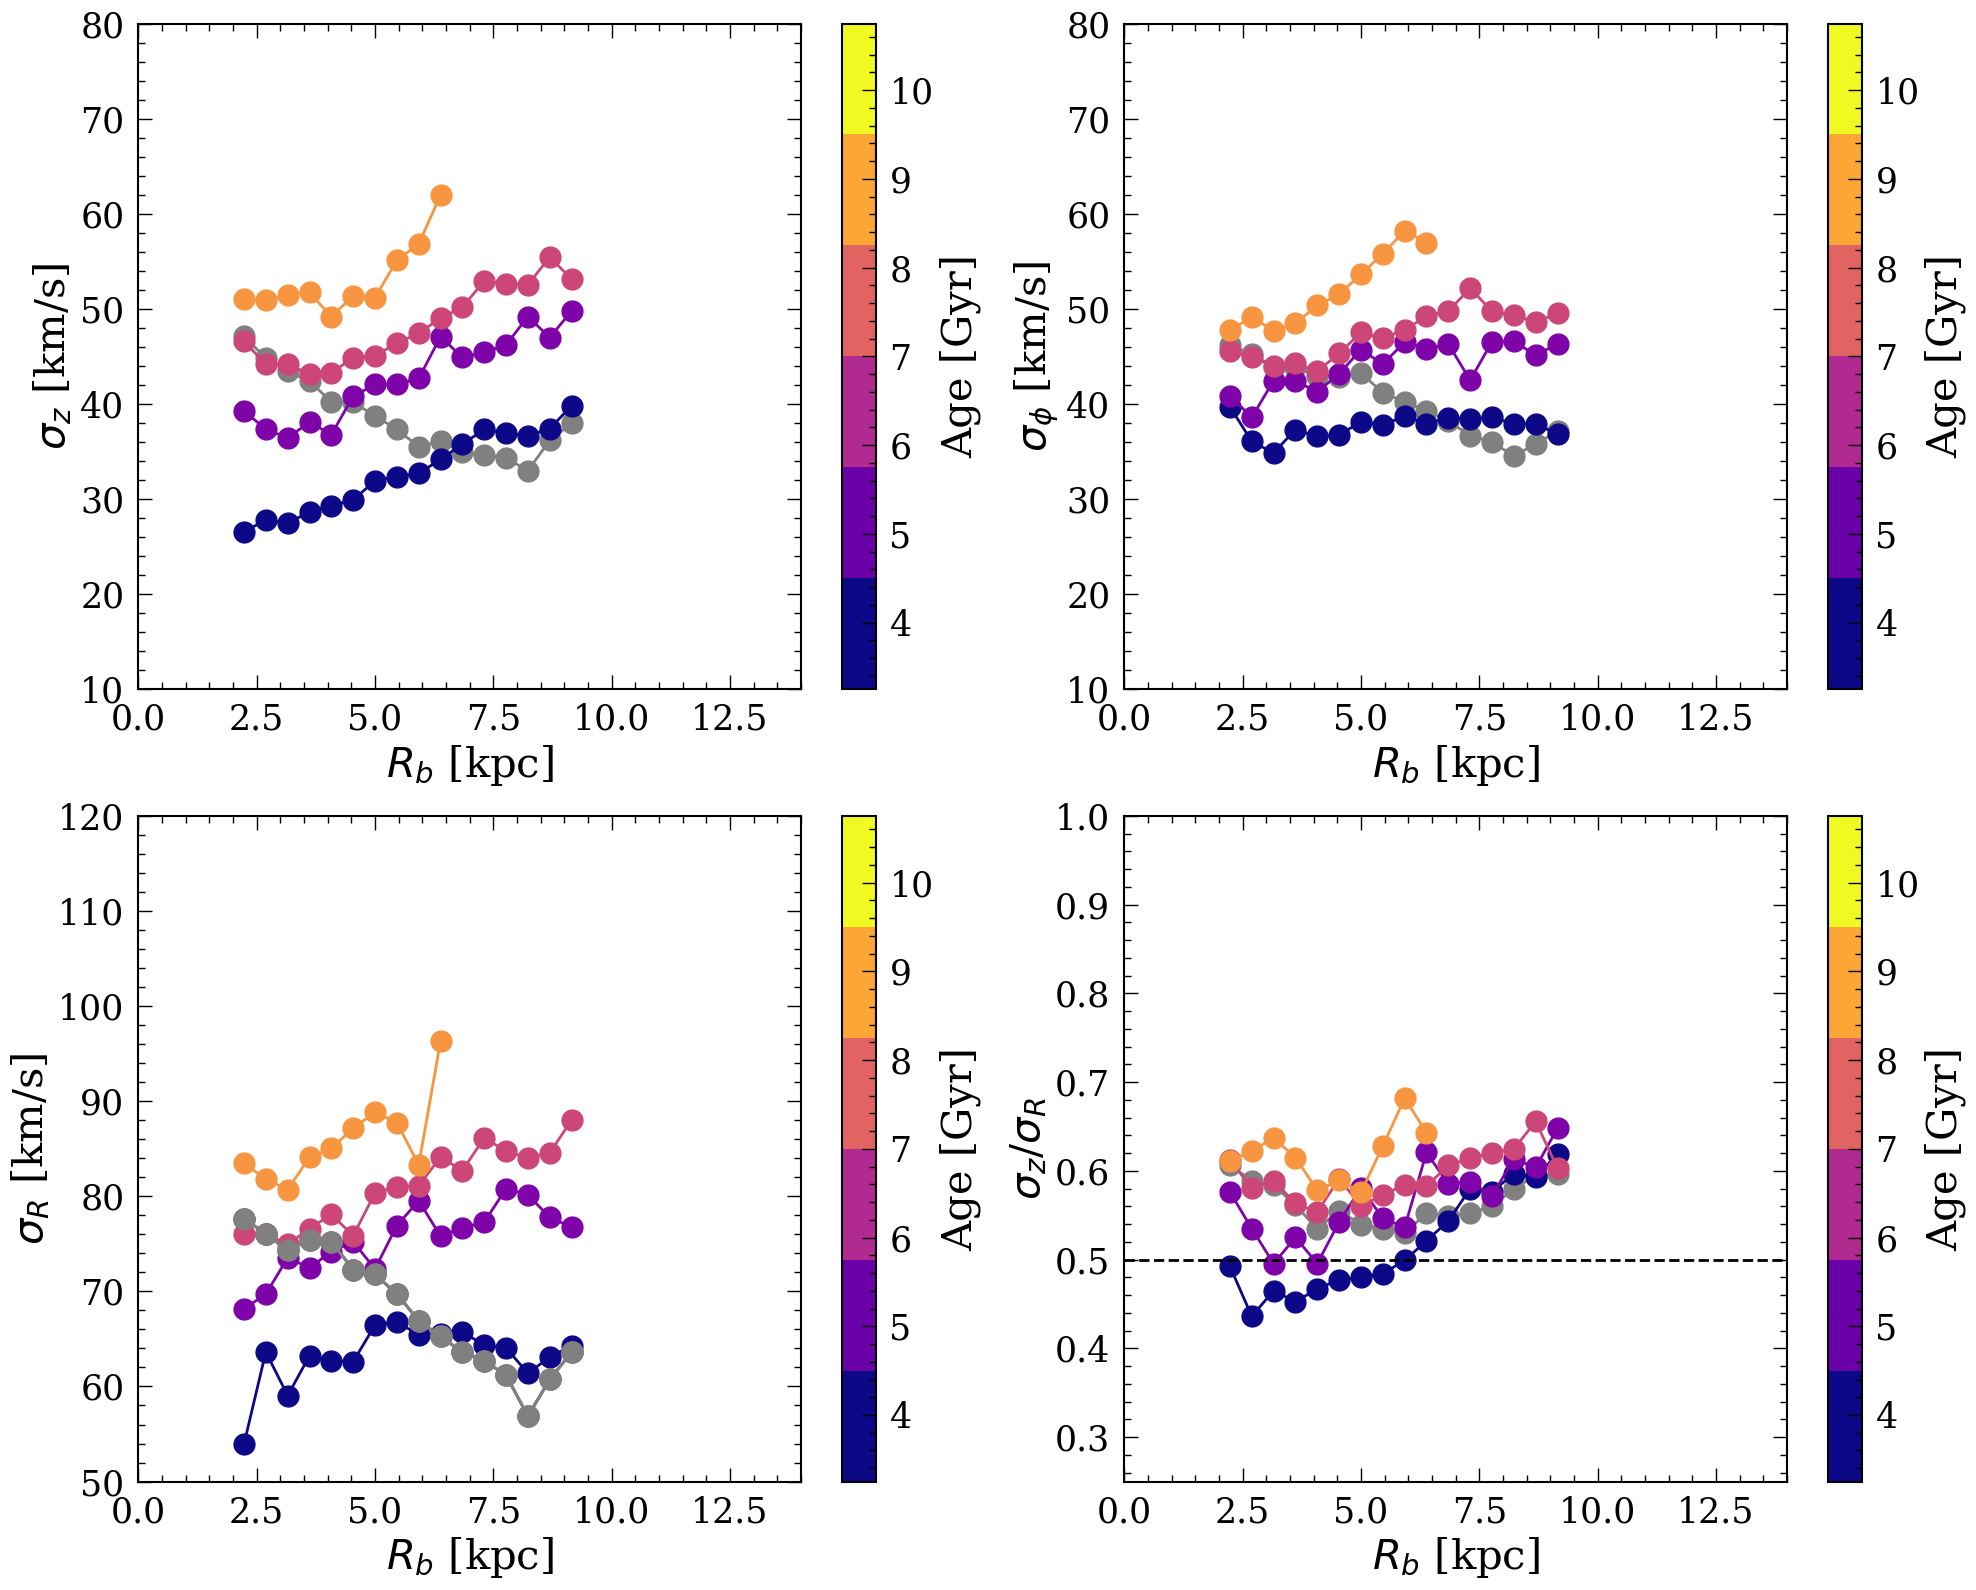

In [88]:

colors = getcolor(np.linspace(2,12,5))

plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
plt.plot(ages, all_z, 'o-', color='grey', label='All',
            markersize=15)
for i in range(len(rs)):
    plt.plot(ages, avrs_z[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
    plt.xlabel('$R_b$ [kpc]')
    plt.ylabel('$σ_z$ [km/s]')
plt.scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap=plt.get_cmap('plasma',6))
plt.ylim([10, 80])
plt.xlim([0,14])
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
#plt.legend()


plt.subplot(2,2,2)
plt.plot(ages, all_phi, 'o-', color='grey', label='All',
            markersize=15)
for i in range(len(rs)):
    plt.plot(ages, avrs_phi[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
    plt.xlabel('$R_b$ [kpc]')
    plt.ylabel('$σ_ϕ$ [km/s]')
plt.ylim([10, 80])
plt.xlim([0,14])
plt.scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap=plt.get_cmap('plasma',6))
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
#plt.legend()



plt.subplot(2,2,3)
for i in range(len(rs)):
    plt.plot(ages, all_r, 'o-', color='grey', label='All',
            markersize=15)
    plt.plot(ages, avrs_r[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
    plt.xlabel('$R_b$ [kpc]')
    plt.ylabel('$σ_R$ [km/s]')
plt.ylim([50, 120])
plt.xlim([0,14])
plt.scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap=plt.get_cmap('plasma',6))
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
#plt.legend()



plt.subplot(2,2,4)
plt.plot(ages, all_z/all_r, 'o-', color='grey', label='All',
            markersize=15)
for i in range(len(rs)):
    plt.plot(ages, avrs_z[i,:]/avrs_r[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
    plt.xlabel('$R_b$ [kpc]')
    plt.ylabel('$σ_z$/$σ_R$')
plt.ylim([0.25, 1])
plt.xlim([0,14])
plt.scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap=plt.get_cmap('plasma',6))
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
#plt.legend()

plt.plot([0,16], [0.5,0.5], 'k--')



plt.tight_layout()

In [89]:
#sub['Rmean'] = (sub['R_PERI']+sub['R_APO'])/2

ages, rs, avrs_z, all_z = avr(sub_tryRb_sub_all['age'].values, sub_tryRb_sub_all['Rb'].values, 
                       sub_tryRb_sub_all['vz'].values, 
                     rbin=np.linspace(2,15,4), agebin=np.linspace(0,12,40))

ages, rs, avrs_phi, all_phi = avr(sub_tryRb_sub_all['age'].values, sub_tryRb_sub_all['Rb'].values, 
                         sub_tryRb_sub_all['vphi'].values, 
                     rbin=np.linspace(2,15,4), agebin=np.linspace(0,12,40))

ages, rs, avrs_r, all_r = avr(sub_tryRb_sub_all['age'].values, sub_tryRb_sub_all['Rb'].values, 
                       sub_tryRb_sub_all['vr'].values, 
                     rbin=np.linspace(2,15,4), agebin=np.linspace(0,12,40))


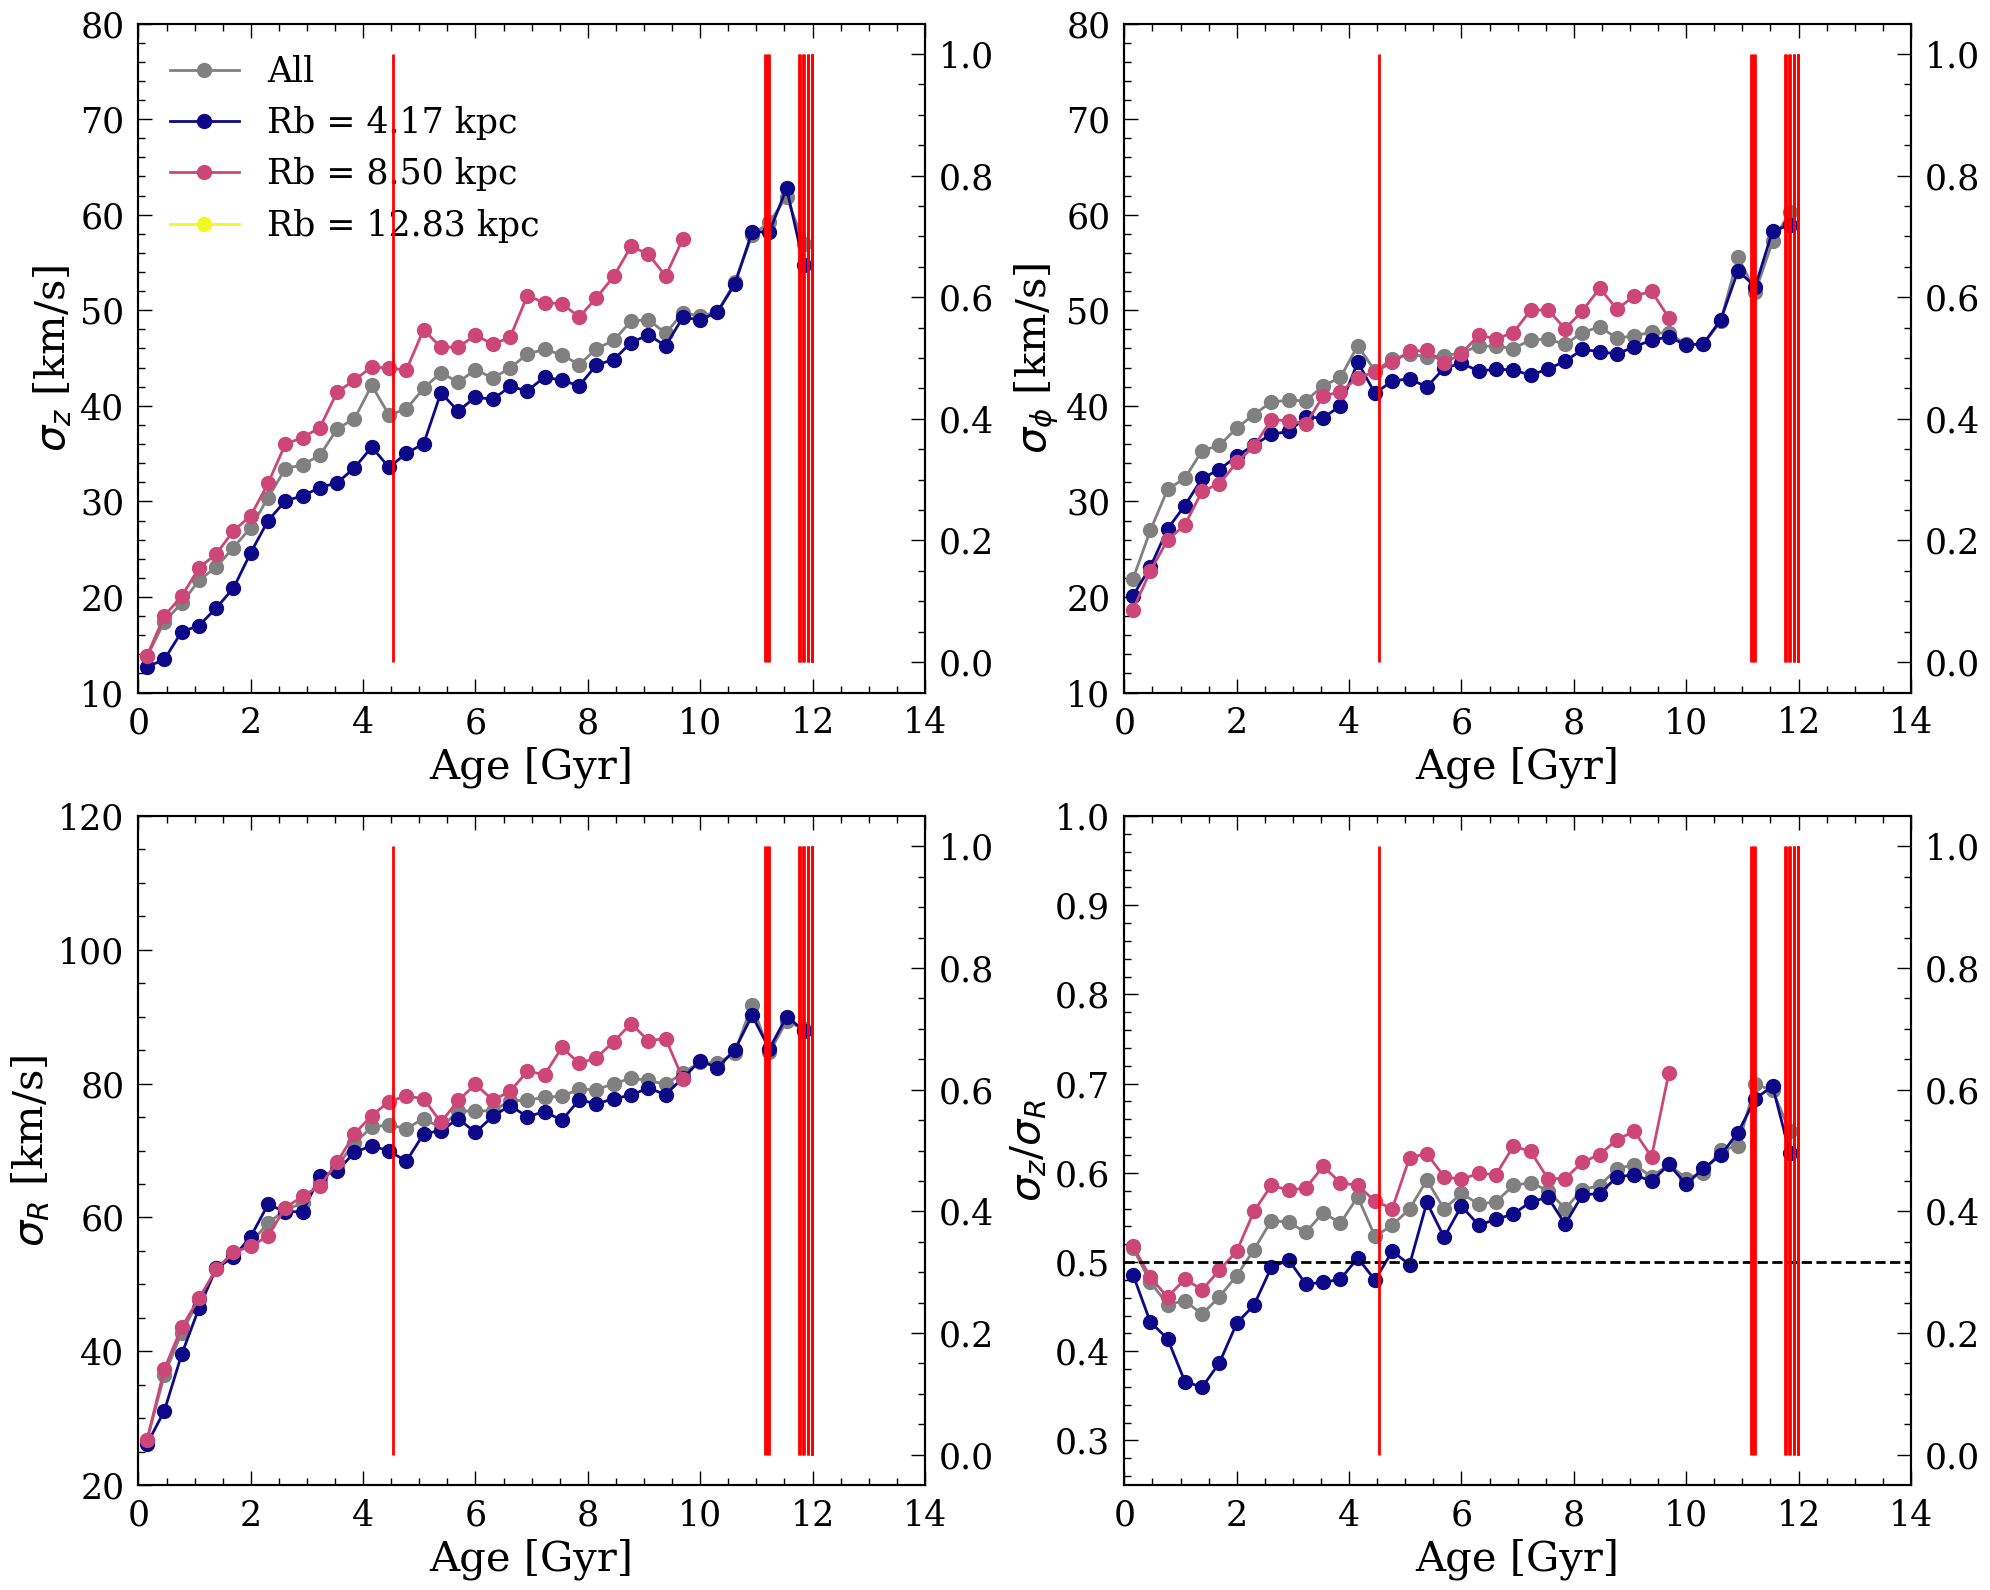

In [106]:


plt.figure(figsize=(20,16))
colors = getcolor(rs)

plt.subplot(2,2,1)
plt.plot(ages, all_z, 'o-', color='grey', label='All',
            markersize=10)
for i in range(len(rs)):
    plt.plot(ages, avrs_z[i,:], 'o-', color=colors[i], label='Rb = %.2f kpc'%rs[i],
            markersize=10)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('$σ_z$ [km/s]')
plt.ylim([10, 80])
plt.xlim([0,14])
plt.legend(loc=2)
plt.twinx()
m = (merger['time']<12)&(merger['ratio']>0.1)
plt.vlines(merger['time'][m], 0, 1, color='red')



plt.subplot(2,2,2)
plt.plot(ages, all_phi, 'o-', color='grey', label='All',
            markersize=10)
for i in range(len(rs)):
    plt.plot(ages, avrs_phi[i,:], 'o-', color=colors[i], label='Rb = %.2f kpc'%rs[i],
            markersize=10)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('$σ_ϕ$ [km/s]')
plt.ylim([10, 80])
plt.xlim([0,14])
plt.twinx()
m = (merger['time']<12)&(merger['ratio']>0.1)
plt.vlines(merger['time'][m], 0, 1, color='red')



plt.subplot(2,2,3)
plt.plot(ages, all_r, 'o-', color='grey', label='All',
            markersize=10)
for i in range(len(rs)):
    plt.plot(ages, avrs_r[i,:], 'o-', color=colors[i], label='Rb = %.2f kpc'%rs[i],
            markersize=10)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('$σ_R$ [km/s]')
plt.ylim([20, 120])
plt.xlim([0,14])
plt.twinx()
m = (merger['time']<12)&(merger['ratio']>0.1)
plt.vlines(merger['time'][m], 0, 1, color='red')



plt.subplot(2,2,4)
plt.plot(ages, all_z/all_r, 'o-', color='grey', label='All',
            markersize=10)
for i in range(len(rs)):
    plt.plot(ages, avrs_z[i,:]/avrs_r[i,:], 'o-', color=colors[i], label='Rb = %.2f kpc'%rs[i],
            markersize=10)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('$σ_z$/$σ_R$')
plt.ylim([0.25, 1])
plt.xlim([0,14])
plt.plot([0,16], [0.5,0.5], 'k--')

plt.twinx()
m = (merger['time']<12)&(merger['ratio']>0.1)
plt.vlines(merger['time'][m], 0, 1, color='red')

plt.tight_layout()







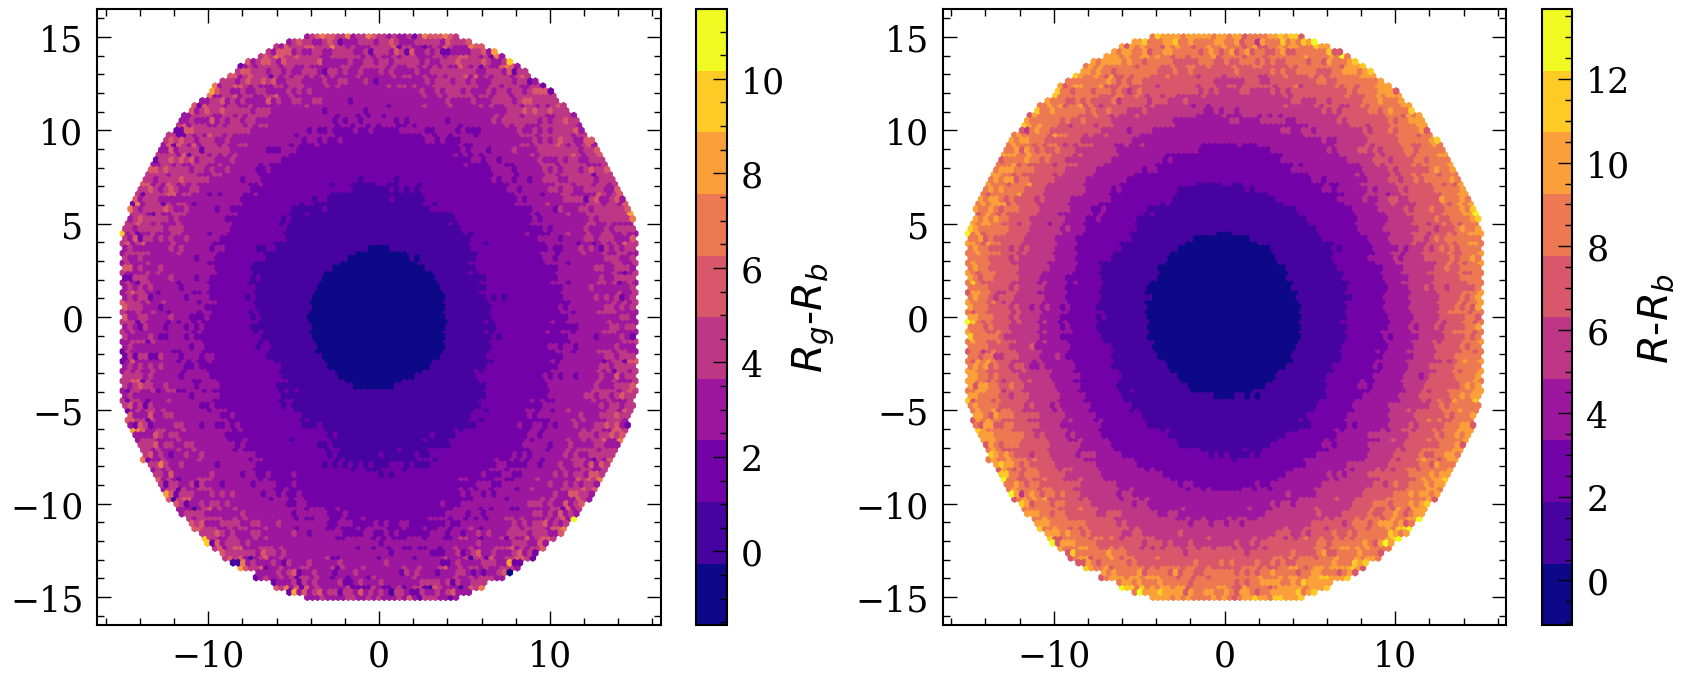

In [425]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hexbin(df_sim['x'],df_sim['y'], C=df_sim['Rg']-df_sim['Rb'],
           extent=(-15,15,-15,15),
          cmap=plt.get_cmap('plasma',10))
plt.colorbar(label='$R_g$-$R_b$')


plt.subplot(1,2,2)
plt.hexbin(df_sim['x'],df_sim['y'], C=df_sim['R']-df_sim['Rb'],
           extent=(-15,15,-15,15),
          cmap=plt.get_cmap('plasma',10))
plt.colorbar(label='$R$-$R_b$')


In [60]:
df_sim.columns

Index(['z', 'metals', 'rxy', 'y', 'mass', 'eps', 'x', 'phi', 'j_circ', 'ke',
       'te', 'decomp', 'j_x', 'j_y', 'tform', 'iord', 'j_z', 'vy', 'vz',
       'vcxy', 'jz_by_jzcirc', 'vx', 'ofe', 'feh', 'age', 'Rbir', 'zbir', 'R',
       'dR', 'dz', 'vc', 'Rg', 'Rb', 'vr', 'vphi'],
      dtype='object')

"plt.figure(figsize=(10,8))\nplt.hexbin(ztfstars['R'], ztfstars['R']-ztfstars['Rb'], C=ztfstars['mh_xgboost'],\n           cmap=plt.get_cmap('plasma',10))\nplt.colorbar(label='[Fe/H]')\nplt.xlabel('$R$ [kpc]')\nplt.ylabel('$R-R_b$ [kpc]')"

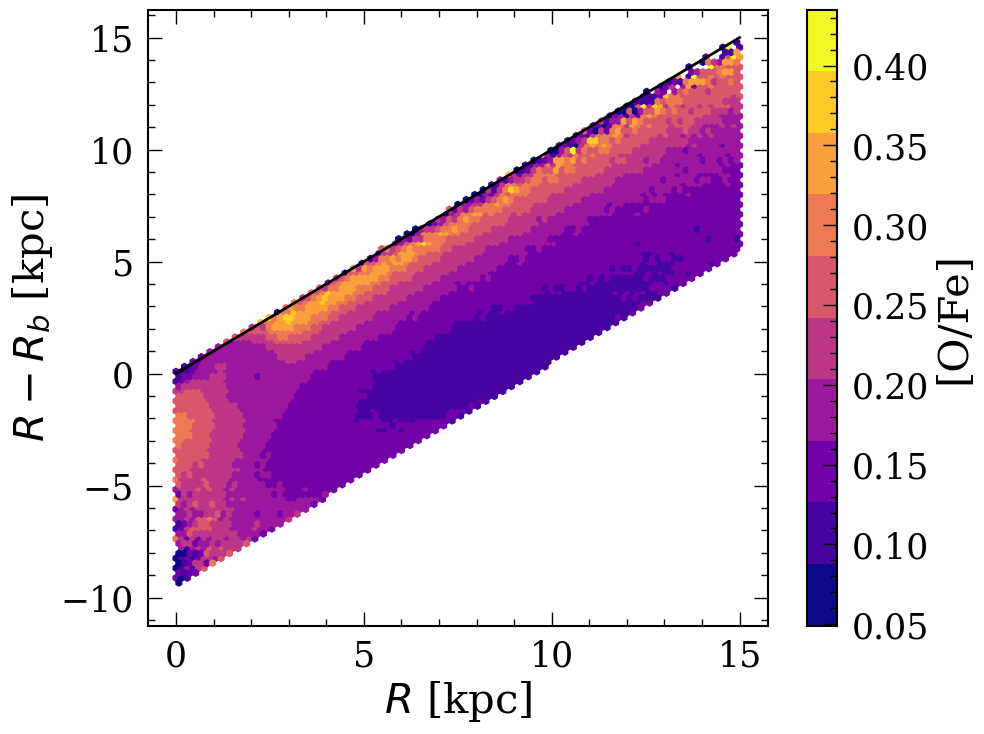

In [62]:
plt.figure(figsize=(10,8))
plt.hexbin(df_sim['R'], df_sim['R']-df_sim['Rb'], C=df_sim['ofe'],
           cmap=plt.get_cmap('plasma',10), extent=(0,15,-10,15))
plt.colorbar(label='[O/Fe]')
plt.xlabel('$R$ [kpc]')
plt.ylabel('$R-R_b$ [kpc]')
plt.plot([0,15], [0,15], 'k-')


"""plt.figure(figsize=(10,8))
plt.hexbin(ztfstars['R'], ztfstars['R']-ztfstars['Rb'], C=ztfstars['mh_xgboost'],
           cmap=plt.get_cmap('plasma',10))
plt.colorbar(label='[Fe/H]')
plt.xlabel('$R$ [kpc]')
plt.ylabel('$R-R_b$ [kpc]')"""



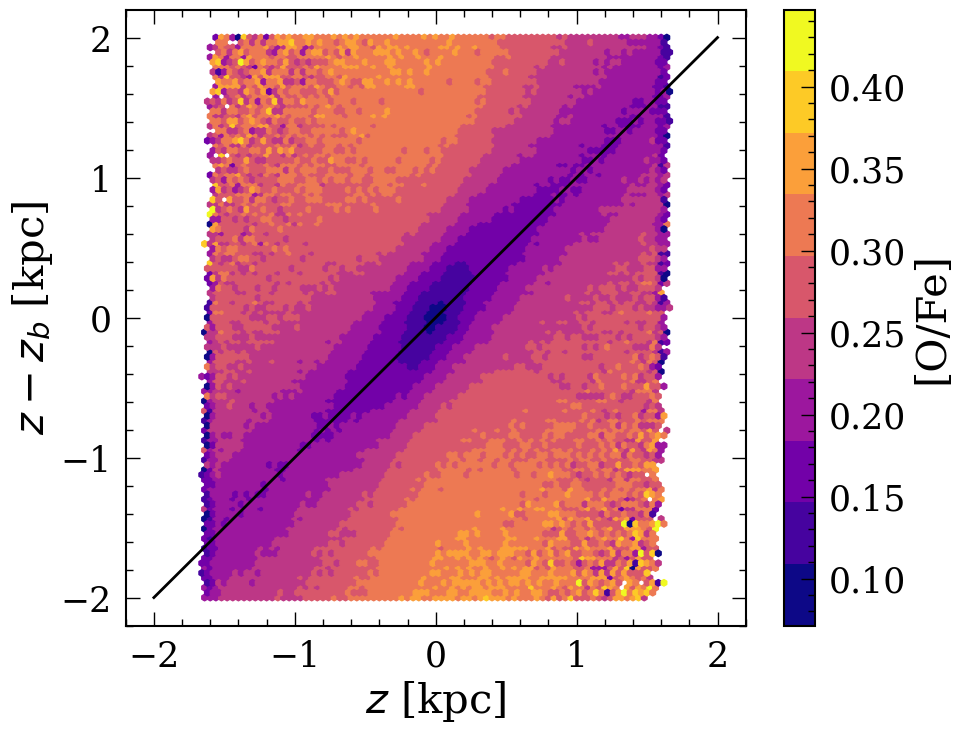

In [65]:
plt.figure(figsize=(10,8))
plt.hexbin(df_sim['z'], df_sim['z']-df_sim['zbir'], C=df_sim['ofe'],
           cmap=plt.get_cmap('plasma',10), extent=(-2,2,-2,2))
plt.colorbar(label='[O/Fe]')
plt.xlabel('$z$ [kpc]')
plt.ylabel('$z-z_b$ [kpc]')
plt.plot([-2,2], [-2,2], 'k-')



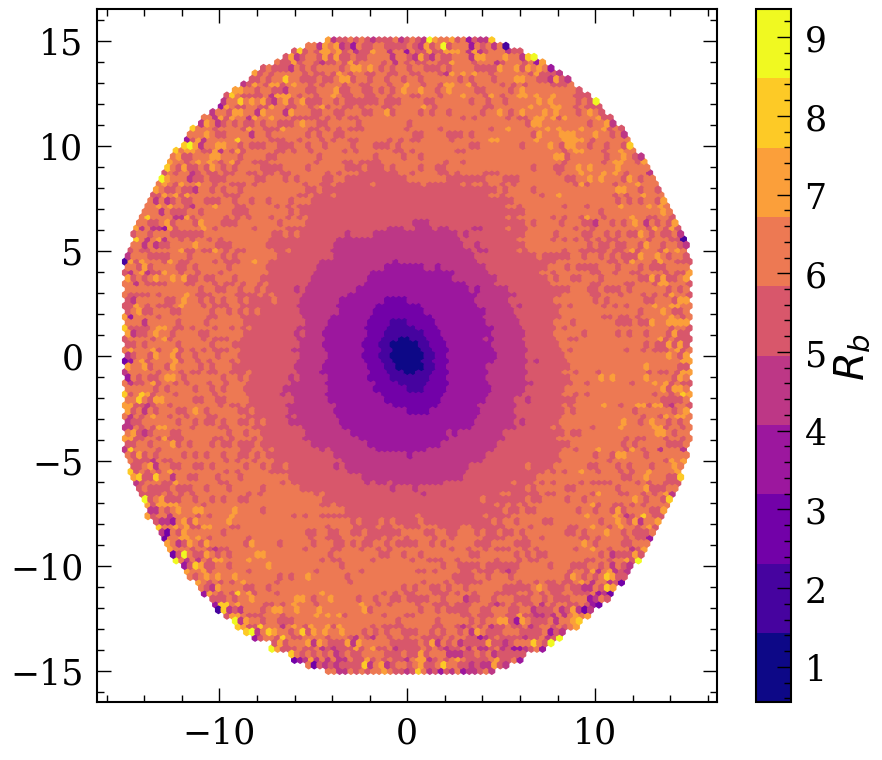

In [427]:
plt.figure(figsize=(10,9))
plt.hexbin(df_sim['x'],df_sim['y'], C=df_sim['Rb'],
           extent=(-15,15,-15,15),
          cmap=plt.get_cmap('plasma',10))
plt.colorbar(label='$R_b$')


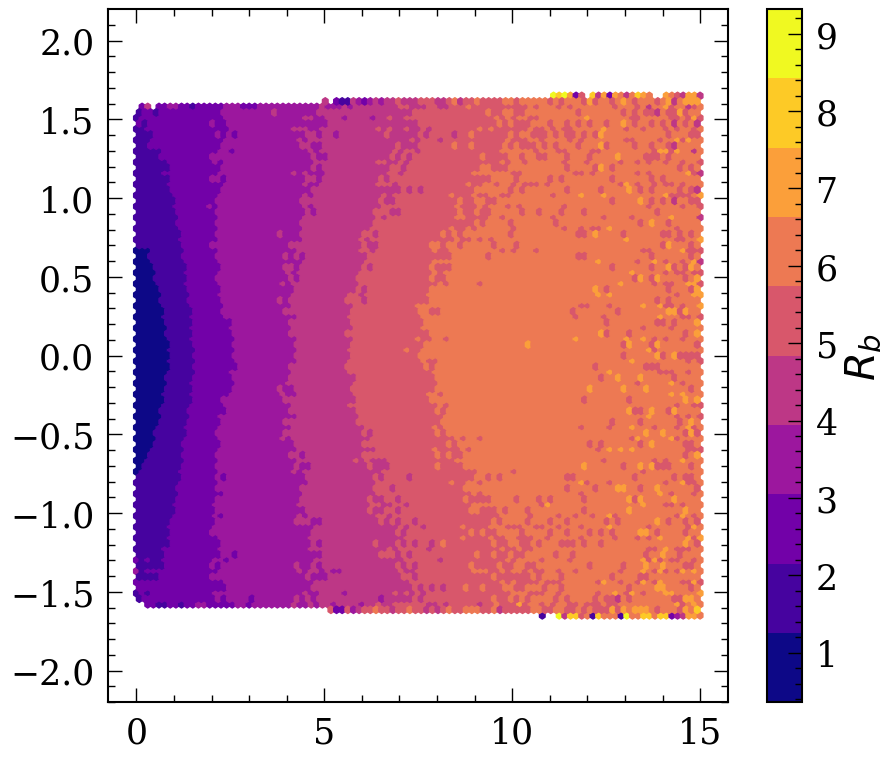

In [428]:
plt.figure(figsize=(10,9))
plt.hexbin(df_sim['R'],df_sim['z'], C=df_sim['Rb'],
           extent=(0,15,-2,2),
          cmap=plt.get_cmap('plasma',10))
plt.colorbar(label='$R_b$')

